<a href="https://colab.research.google.com/github/ValeRomanA/Proyecto_frecuencias/blob/main/Proyectov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gráficos de frecuencias de latidos de corazón**




1. Importar librerias

En esta primera sección se importaron las librerias necesarias para el funcionamiento del códico como:
´numpy´ para realizar operaciones matemáticas, ´random´ para la generación de números aleatorios, ´wave´ para el análisis de señales, ´glob´ que busca archivos en un directorio especificado con una extensión específica en este caso .WAV y tambien se exportaron algunas funciones de graficación

In [ ]:
# Importar librerias de phyton
import numpy as np
import random as rd
import wave
import sys
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# Comandos para crear imágenes de alta resolución
%config InlineBackend.figure_format = {'png', 'retina'}
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting


ERROR:root:The 'figure_format' trait of an InlineBackend instance expected a unicode string, not the tuple ('png', 'retina').


2. Cargar los archivos

En este sección se define una función llamada ´filename´ que lo que hace es abrir el archivo con extensión .WAV obtiene ciertos datos de esta onda como el número de canales, la frecuencia de muestreo y otros datos los cuáles guarda en una variable llamada ´waveData´ y en un vector de tiempo donde ocurren esas muestras llamado ´timeECG´.

En ´variable´ se especifica el directorio donde se encuentran los audios y luego se crea una nueva variable con la función glob hace una lista con los audios y los guarda. Esa lista se guarda en una nueva variable ´nice´ con la cual va a funcionar un ciclo for que invoca a la función principal ´filename´ y grafica cada uno de los audios.

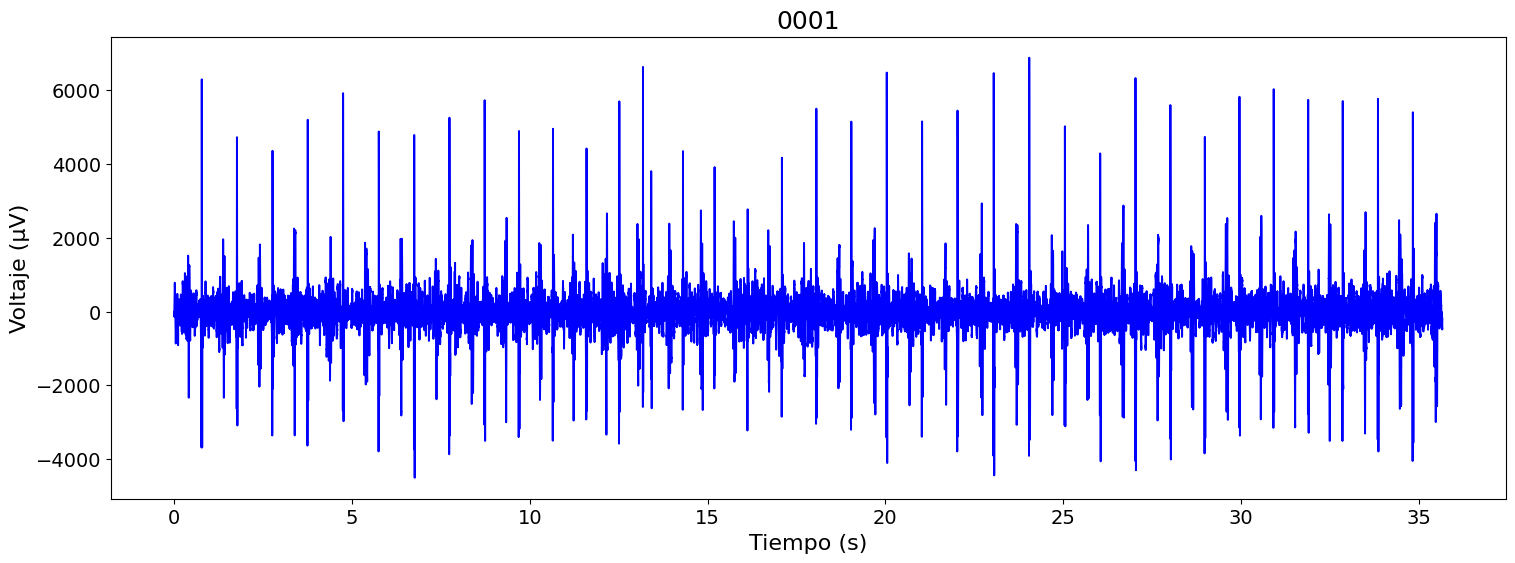

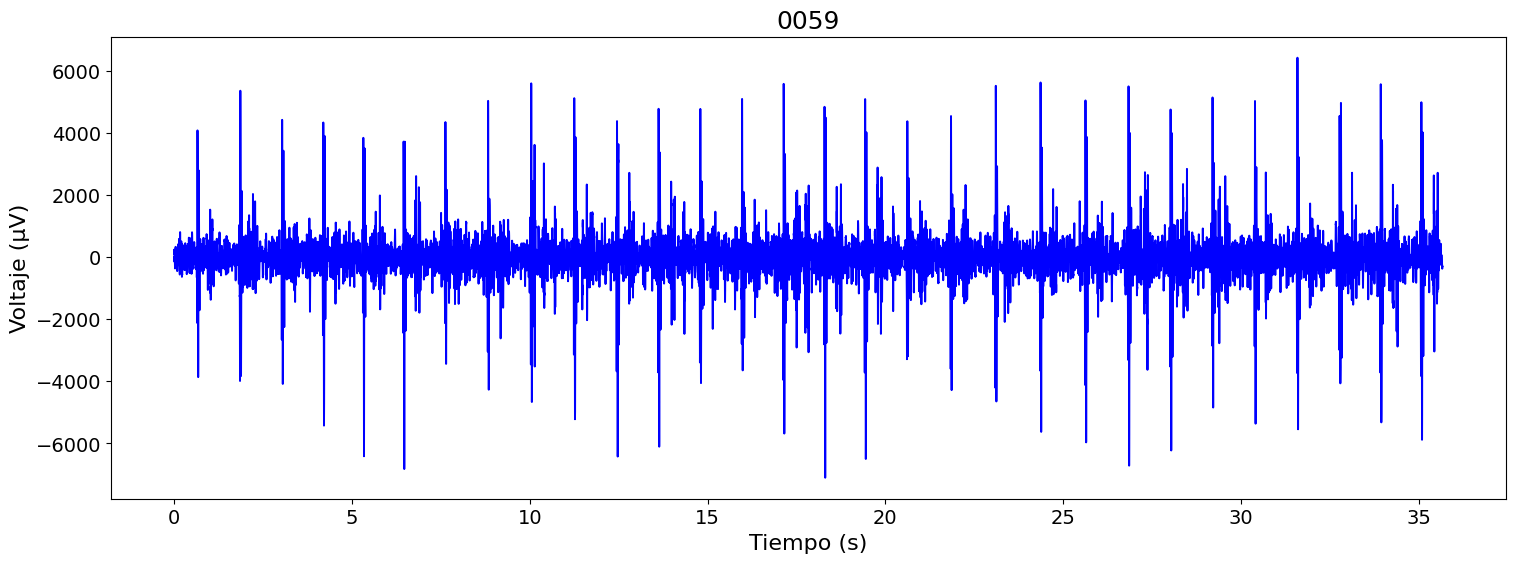

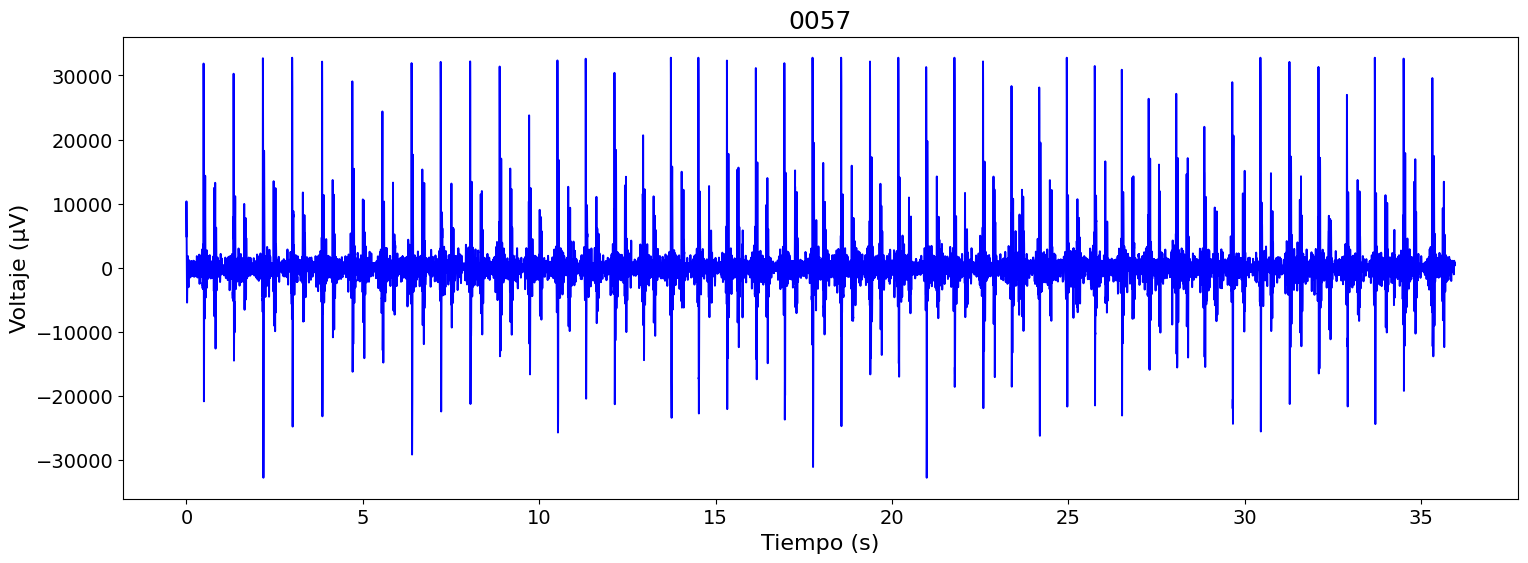

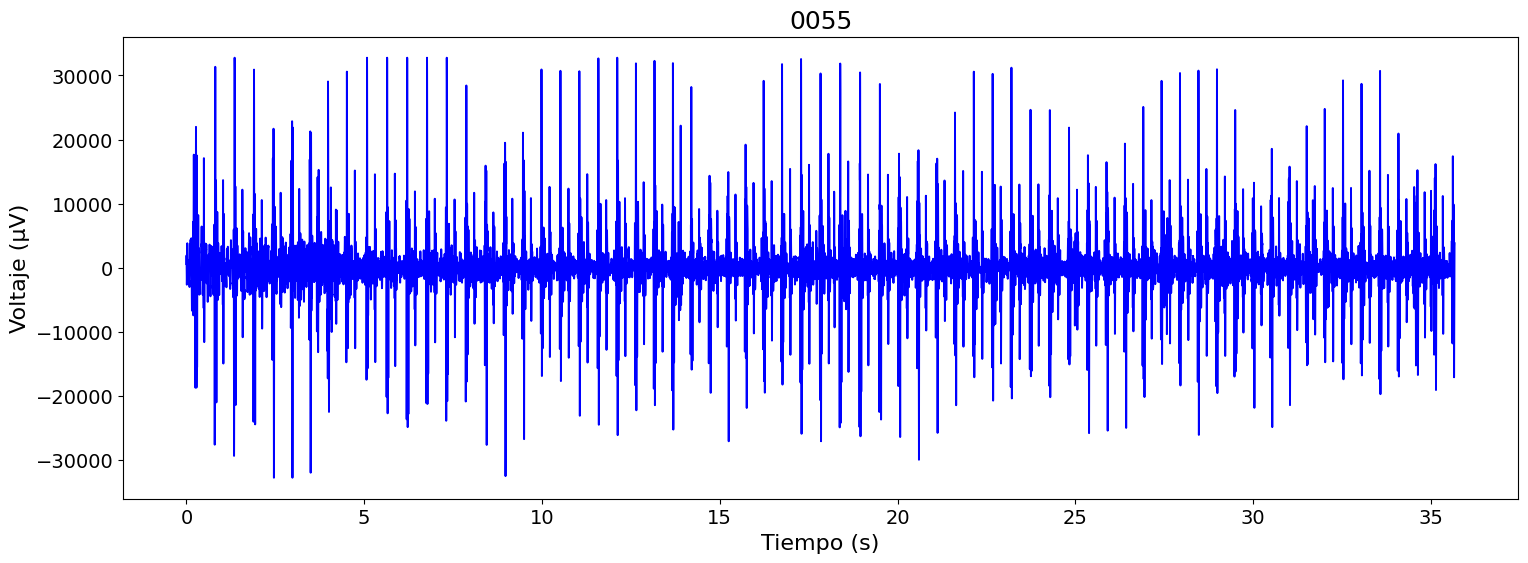

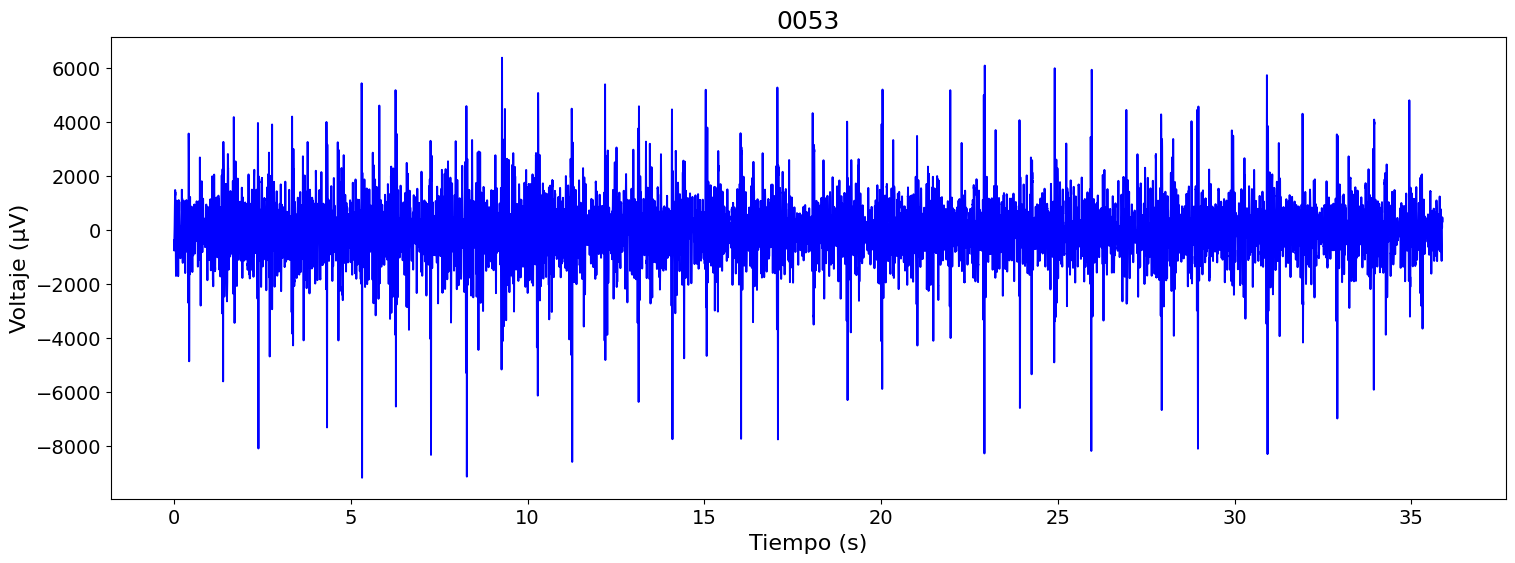

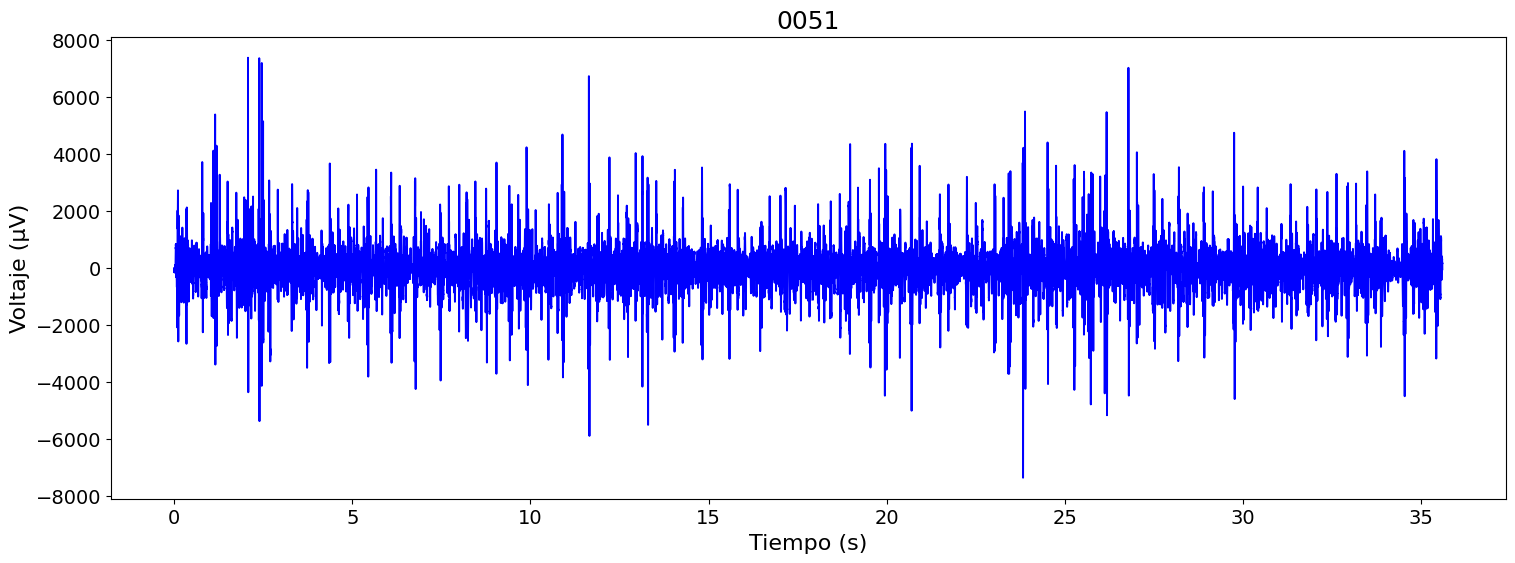

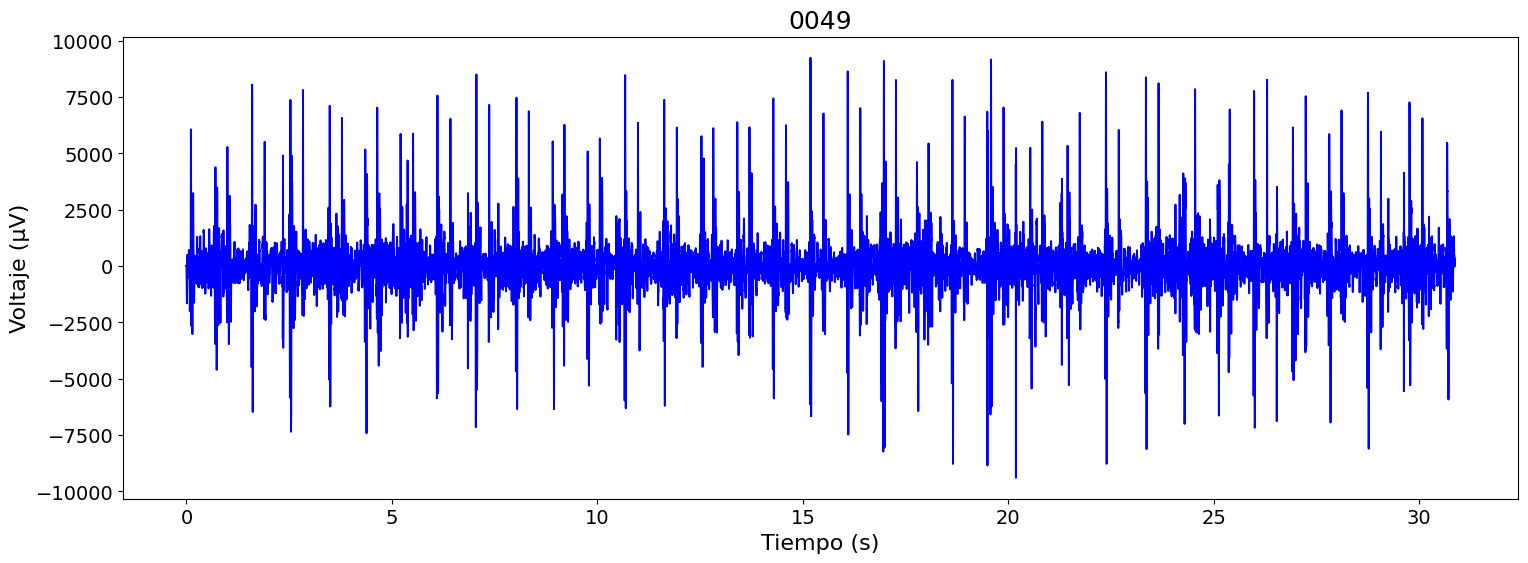

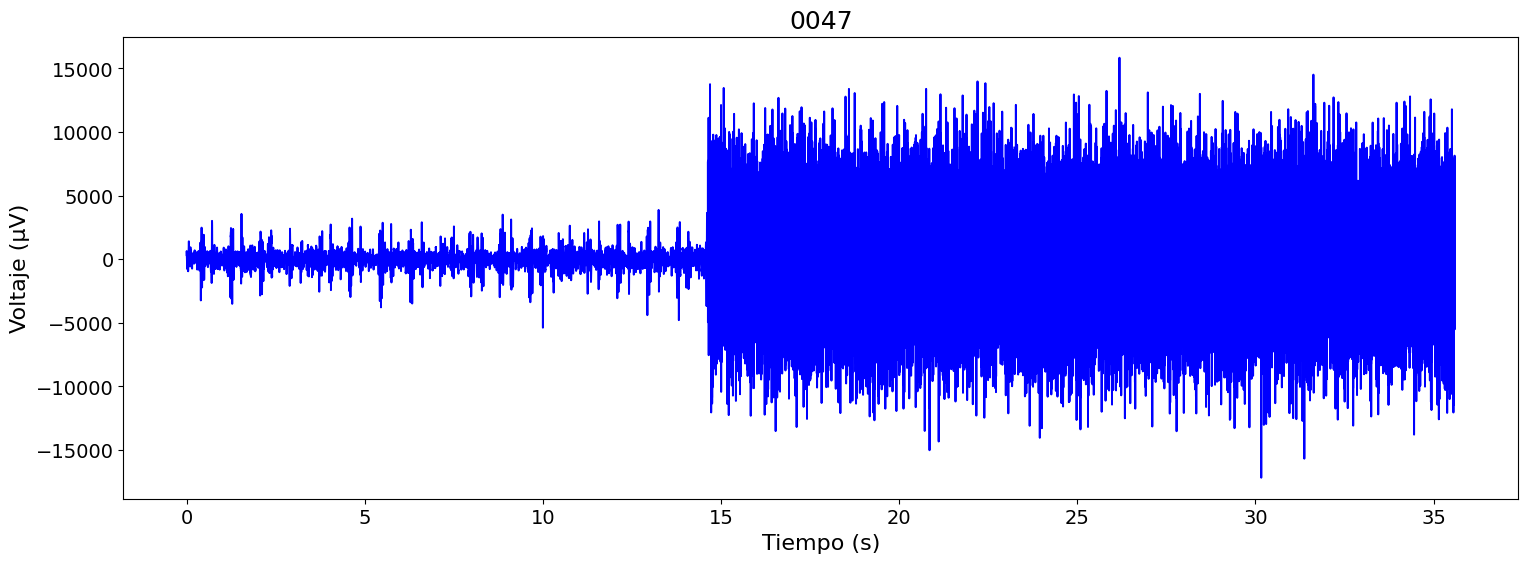

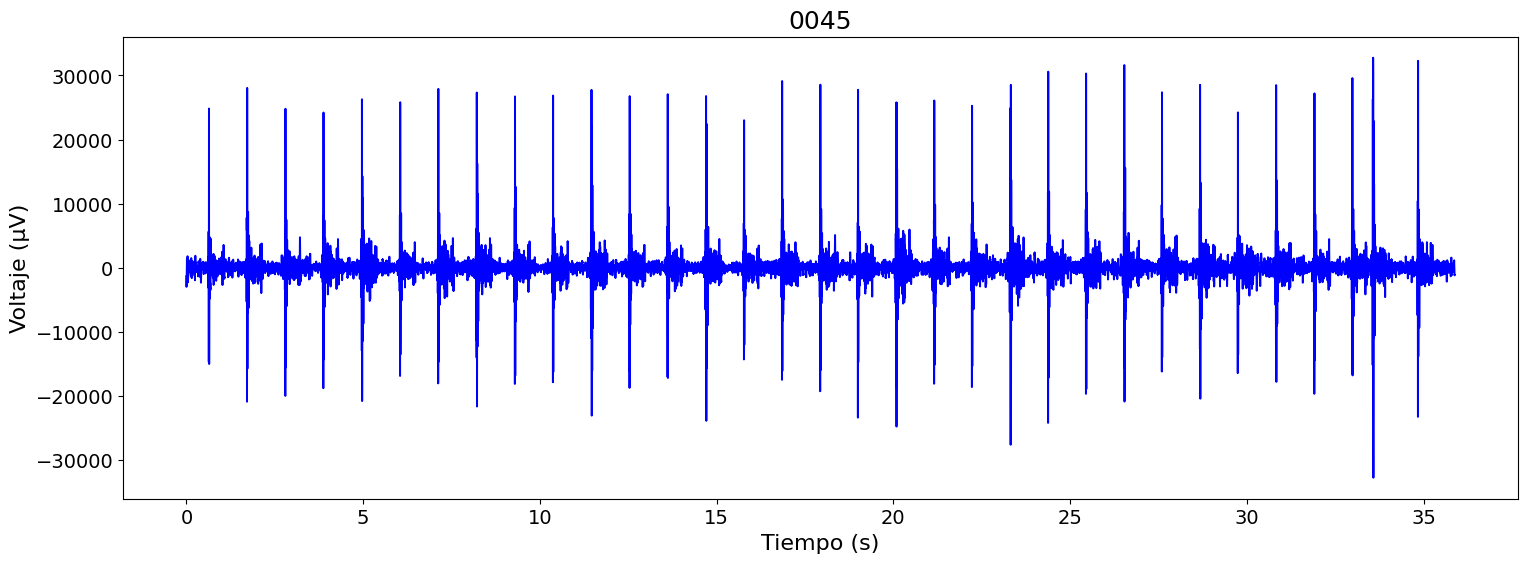

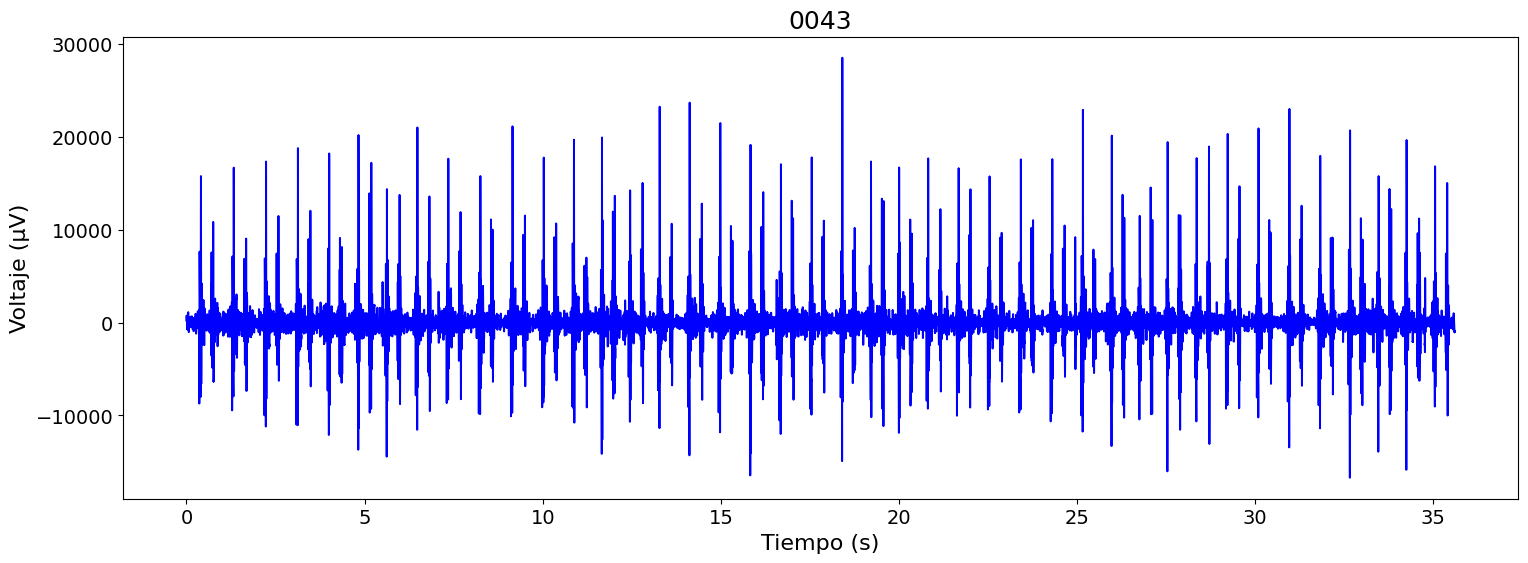

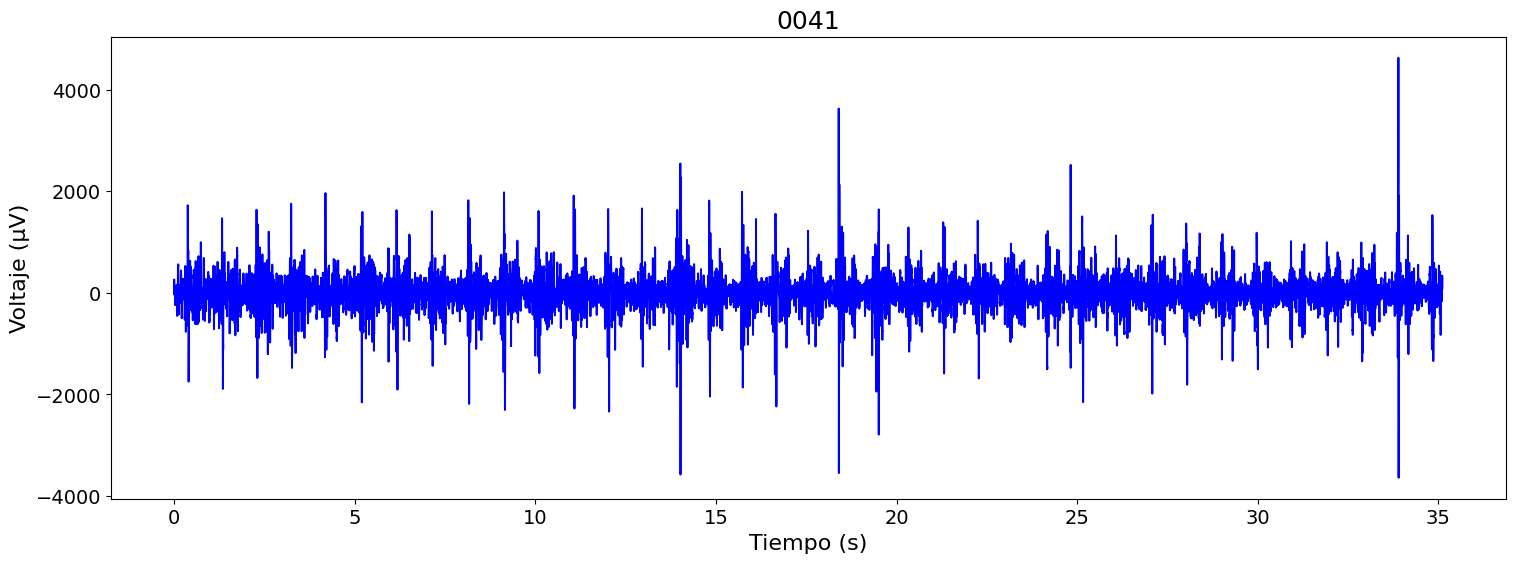

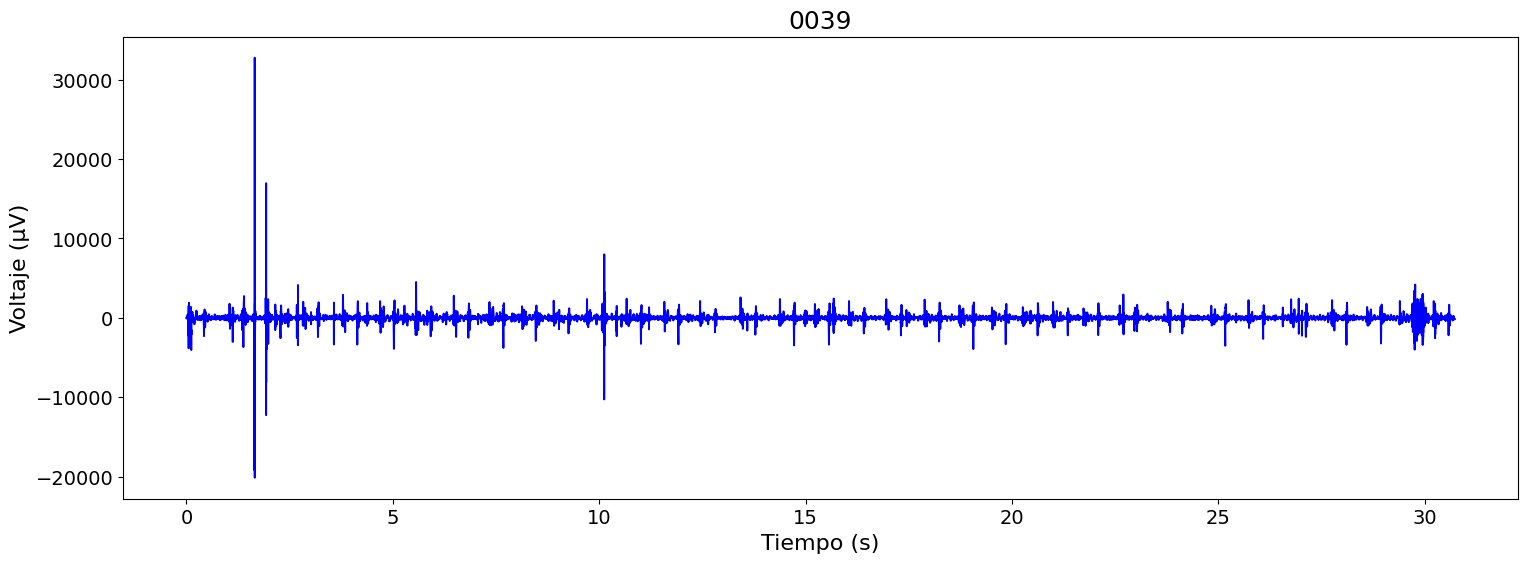

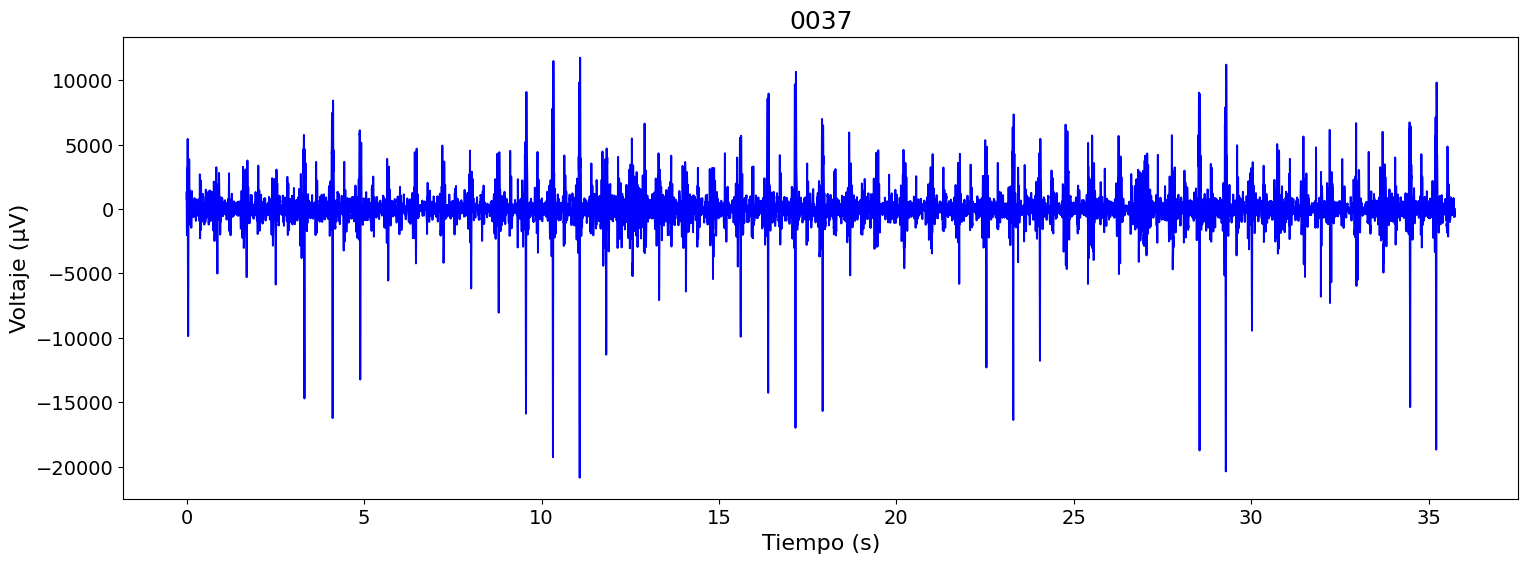

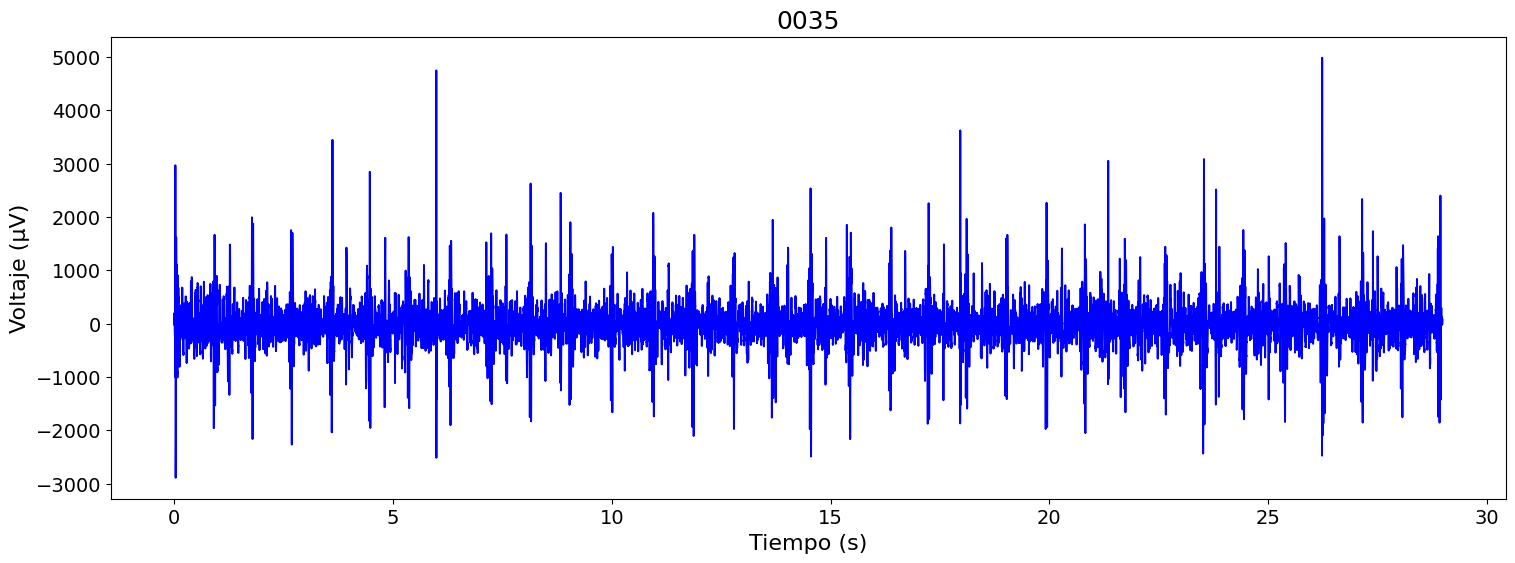

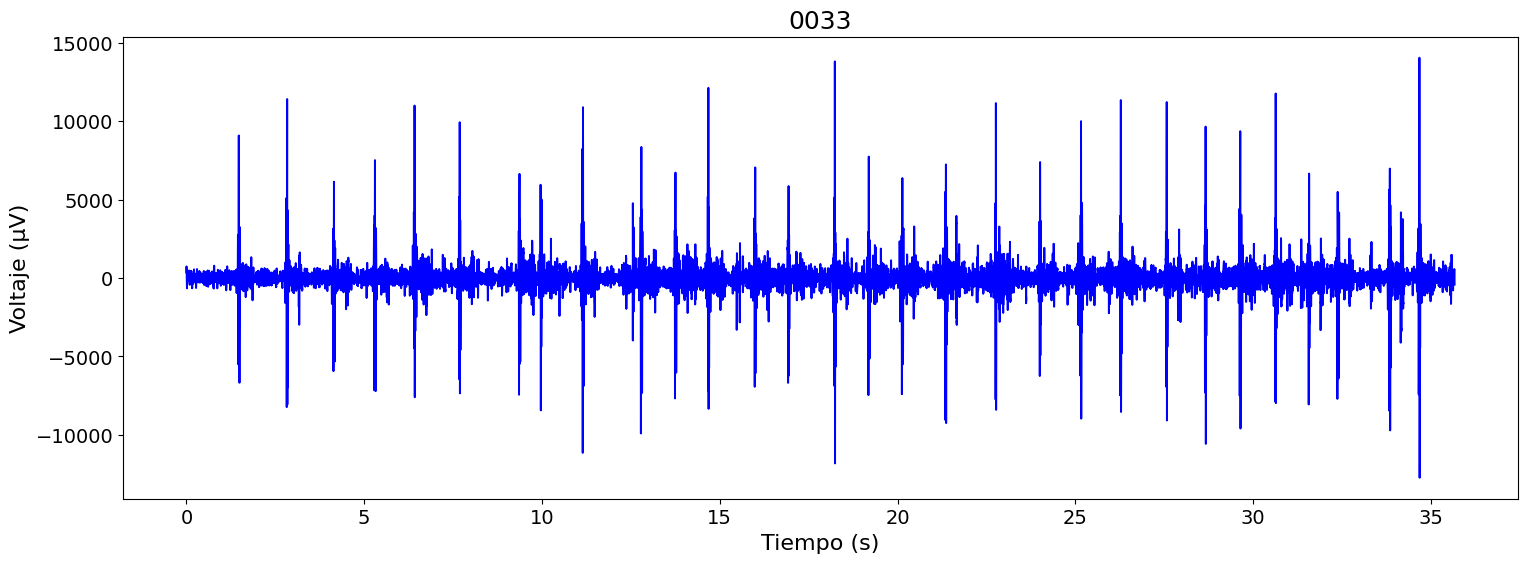

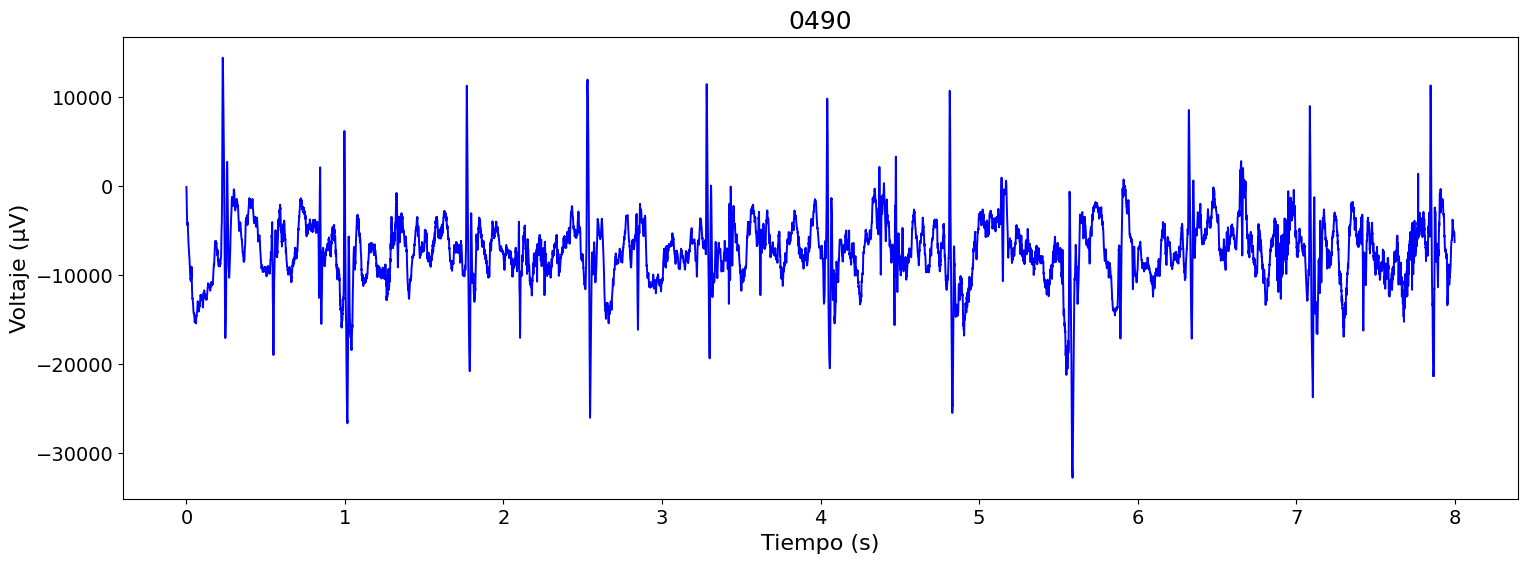

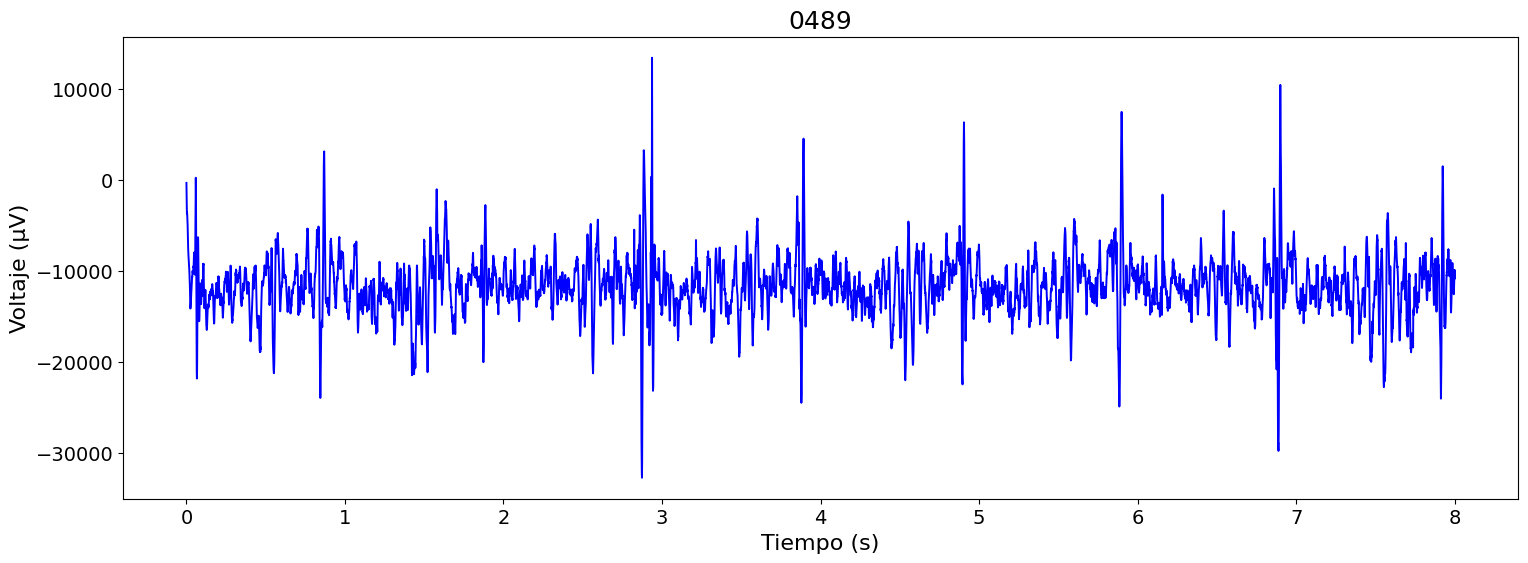

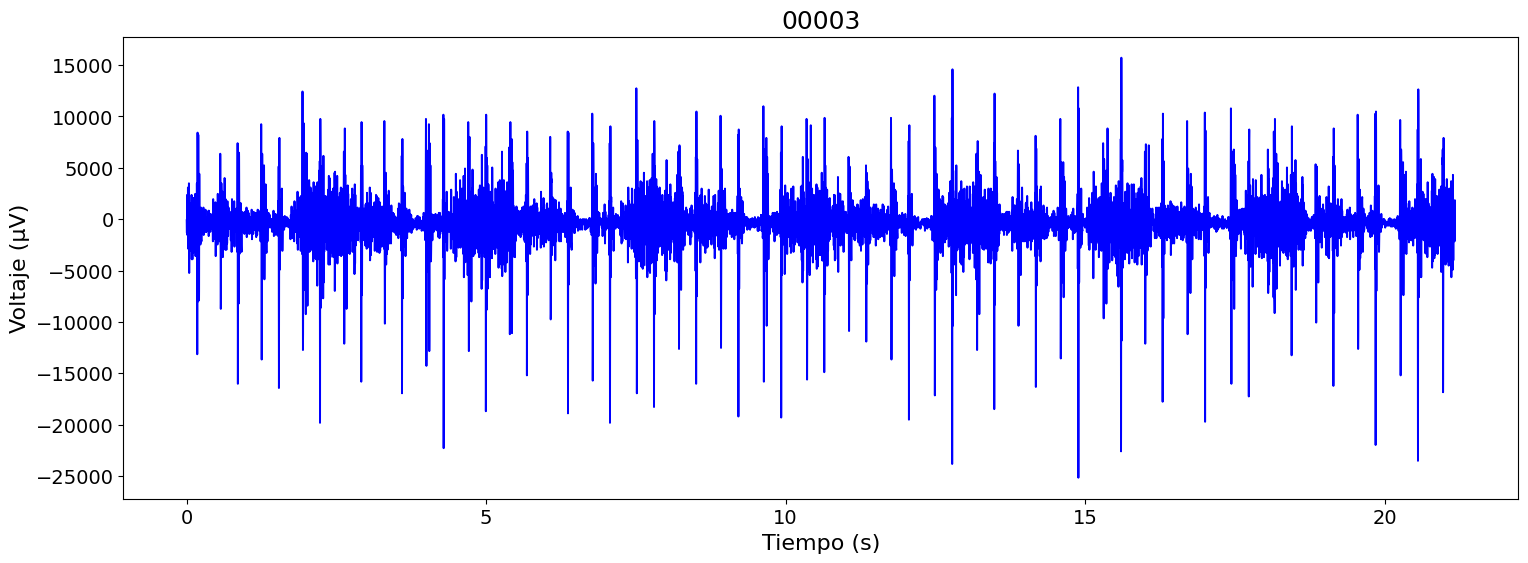

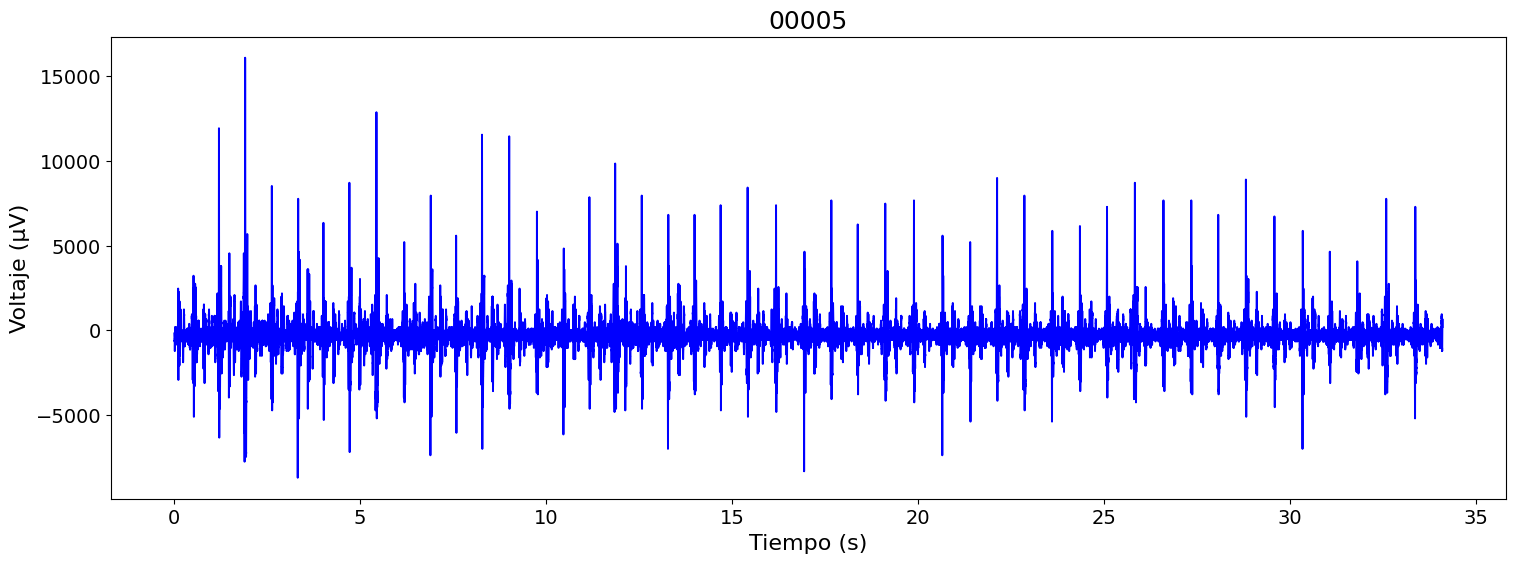

In [ ]:
#Función que procesa el archvio wav
def ecg(filename):
    record = wave.open(filename, 'rb')  # Abre el archivo
    # Obtiene la información del archivo
    numChannels = record.getnchannels()
    numFrames = record.getnframes()
    sampleRate = record.getframerate()
    sampleWidth = record.getsampwidth()

    # Obtiene los datos del archivo
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Obtiene la ventana de tiempo
    timeECG = np.linspace(0, len(waveData) / sampleRate, num=len(waveData))

    return timeECG, waveData

# Especifica el directorio en el que deseas buscar archivos .wav
variable = '/content/drive/MyDrive/audios - copia'
archivos_wav = glob.glob(f'{variable}/*.wav')

# Utiliza glob para buscar archivos .wav en el directorio especificado
nice = archivos_wav

for filename in nice:
    timeECG, waveData = ecg(filename)

    # Grafica la señal de audio
    plt.figure(figsize=(18, 6))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (µV)')
    plt.plot(timeECG, waveData, 'b')
    mensaje = filename
    mensajeb = mensaje[39:44]
    mensajec = mensajeb.replace(".", "")
    plt.title(mensajec)
    plt.show()


3. Grafica de número de latidos

Guarda el audio de interes en ´variable2´ según el directorio especificado, luego crea una nueva función ´zoom´ que abre el audio y obtiene los datos para guardarlos en ´waveData´ y ´timeECG´ con los cuales luego va a graficar los latidos según los parámetros especificados en el eje X (acortando o alargando el límite de tiempo análogo a la función matemática de DESPLAZAMIENTO) para que las gráficas sean de 1 y de 3 respectivamente.

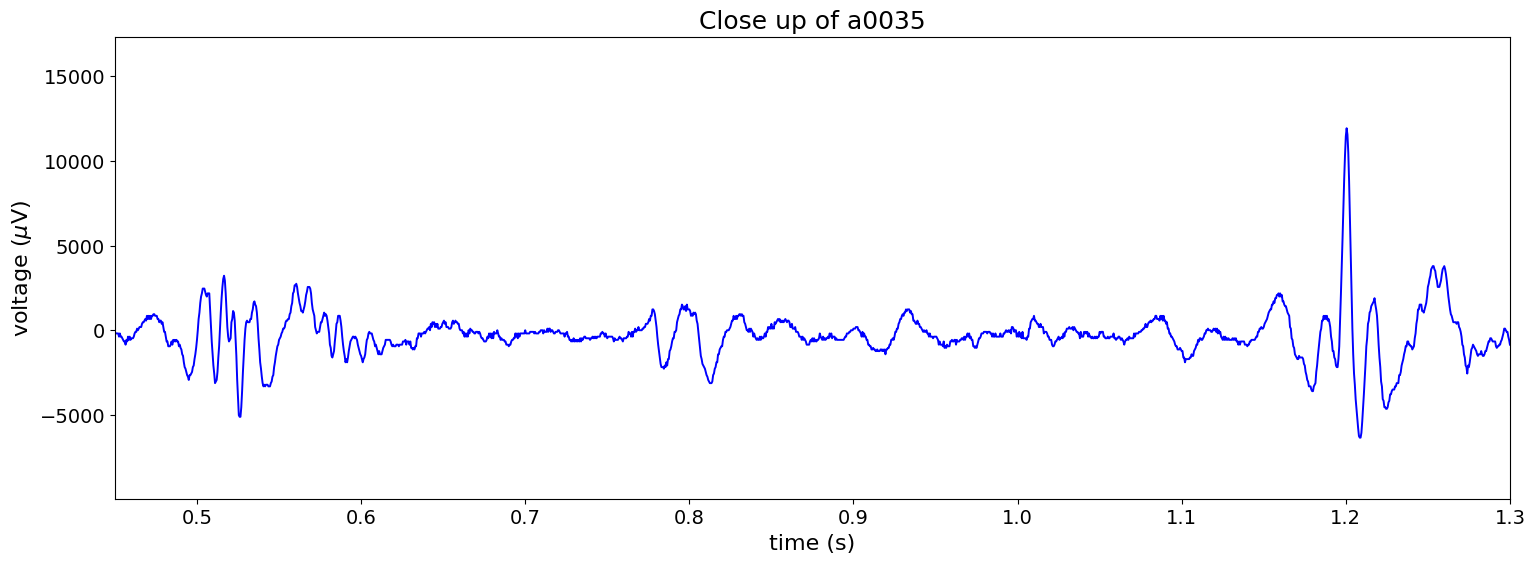

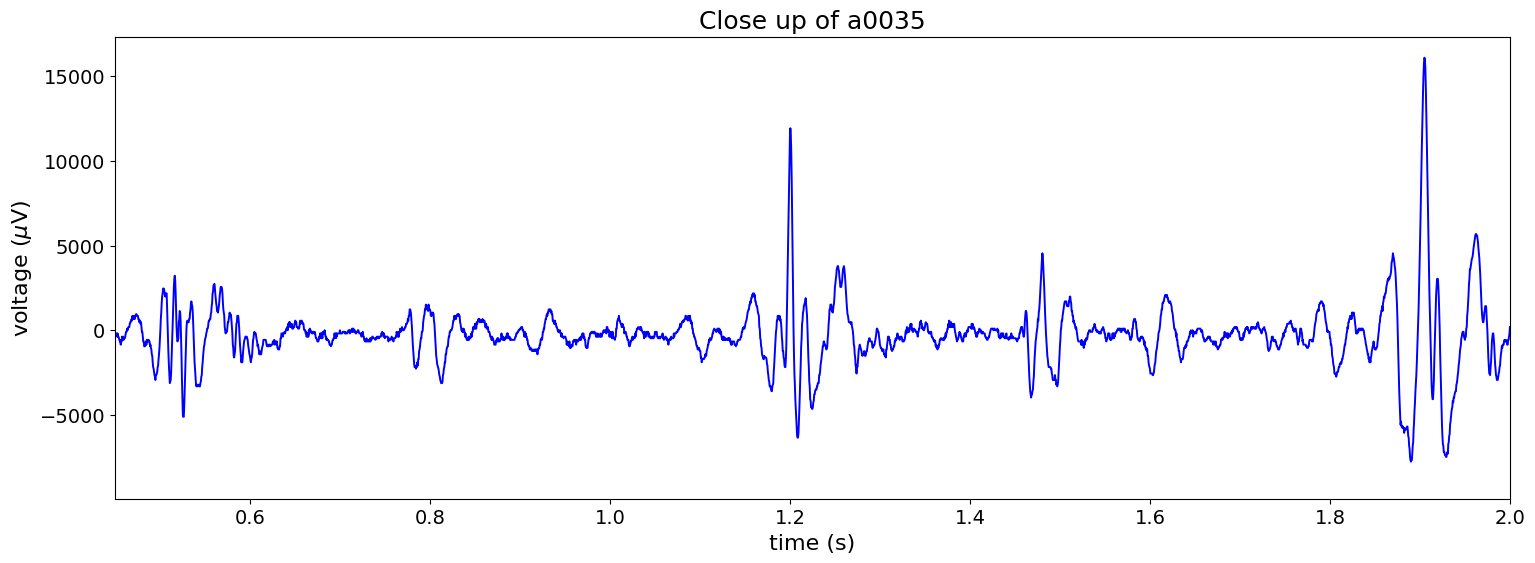

In [ ]:
#Cargar el audio y obtener los datos
variable2 = "/content/drive/MyDrive/audios - copia/a0035.wav"
def ecg(zoom):
    record = wave.open(variable2)
    numChannels = record.getnchannels()
    numFrames = record.getnframes()
    sampleRate = record.getframerate()
    sampleWidth = record.getsampwidth()
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
    return timeECG, waveData

# Gráfico de la señal de un latido
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.45,1.3)
plt.title("Close up of a0035")
plt.show()



# Gráfico de la senal de 3 latidos
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.45,2.0)
plt.title("Close up of a0035")
plt.show()

4. Máximos locales
En esta sección del código tambien se hace uso de la función filename para obtener los datos que se guardan en la variable ´waveData´ y en elvector de tiempo ´timeECG´ para utilizarlos en una nueva función llamada ´detecta_maximos_locales´. Esta función primero verifica que ´waveData´ y ´timeECG´ sean de la misma longitud, si son diferentes indica una excepción en las longitudes. Luego calcula el umbral de máximos locales restando al máximo valor de ´waveData´ el mínimo guardandolo en una variable intervalo.
Con estos valores calcula uno de los parámetros mas impprtantes que del funcionamiento de la función que es el umbral para determinar si un punto es máximo local definiendolo en la variable ´threshold´ como la multiplicación de las variables threshold_ratio, intervalo y sumando el valor minímo de ´waveData´.
Se crean tres listas y mediante un ciclo for si los valores de ´waveData´ están dentro del umbral se guardan en ´maxima-indices´  la cual la función va a retornar para graficar más adelante los puntos máximos y la frecuencia.

Es importante establecer un valor adecuado de threshold_radio para que el valor de umbral sea aproximado y pueda detectar la mayor cantidad de puntos máximos. El valor de la variable ´threshold´ provoca la existencia de dos posibles casos:
1. El audio guardo en ´waveData´ valores dentro del umbral, por lo que permitió encontrar punto máximos y asi graficar la frecuencia que depende de los mismos.
2. El audio no guardo en ´waveData´ valores dentro del umbral, por lo que no se pudo graficar la frecuencia que depende de los mismos.


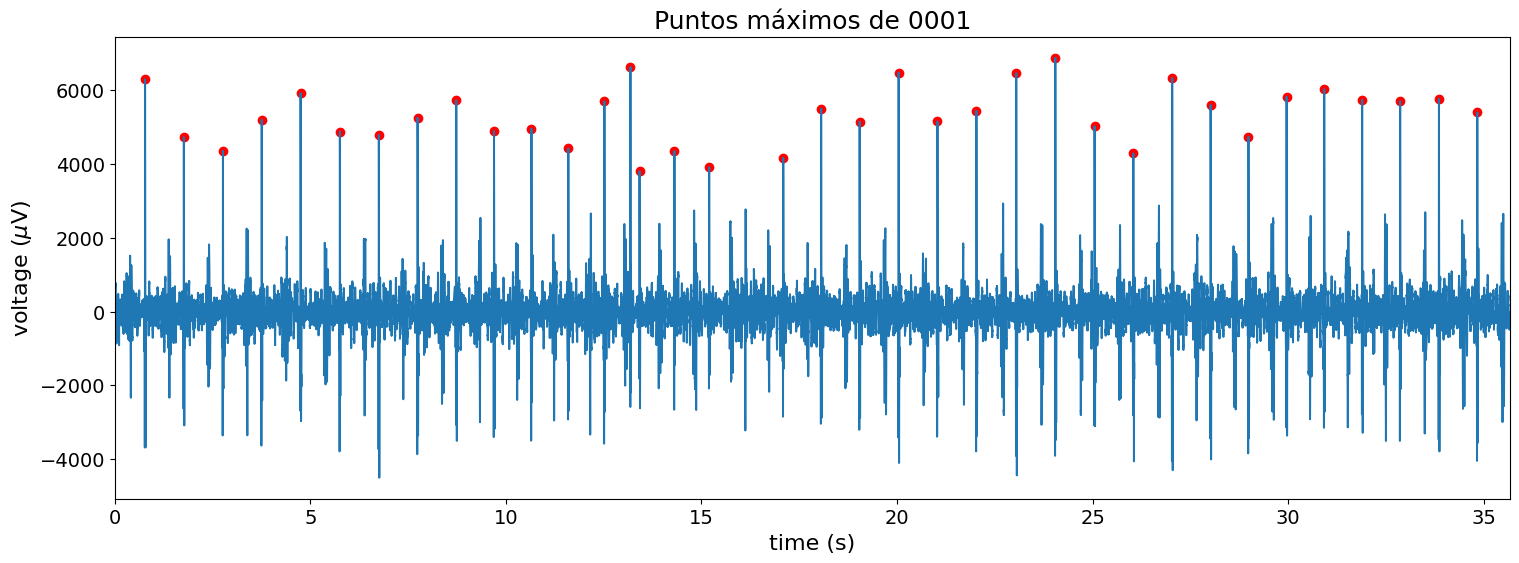

Beats per minute: 60.56187966130209


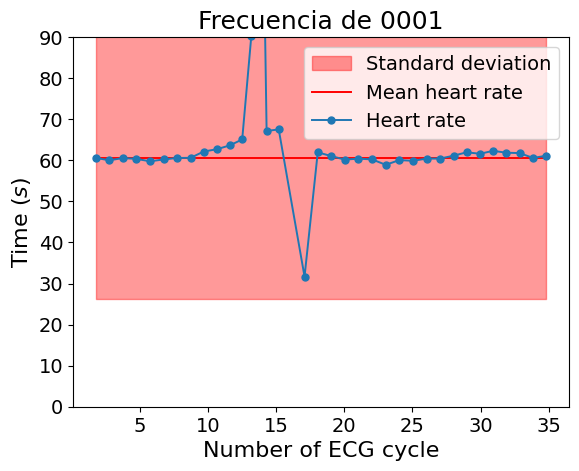

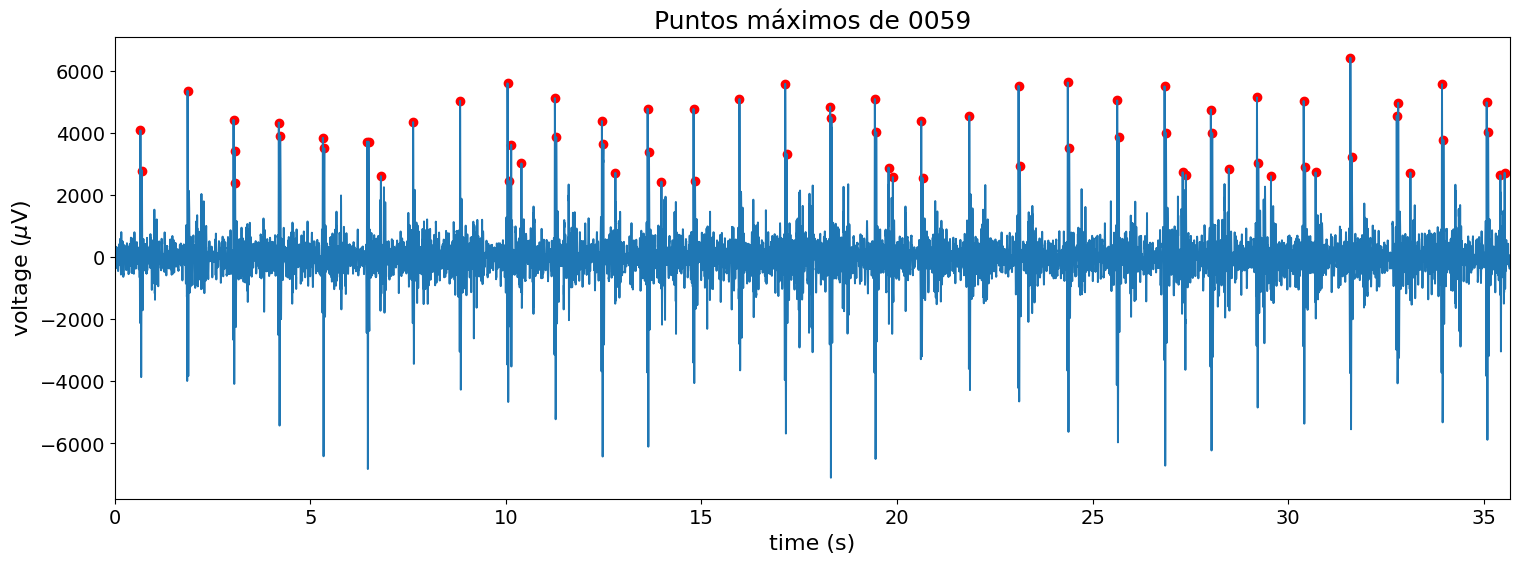

Beats per minute: 119.44148488756801


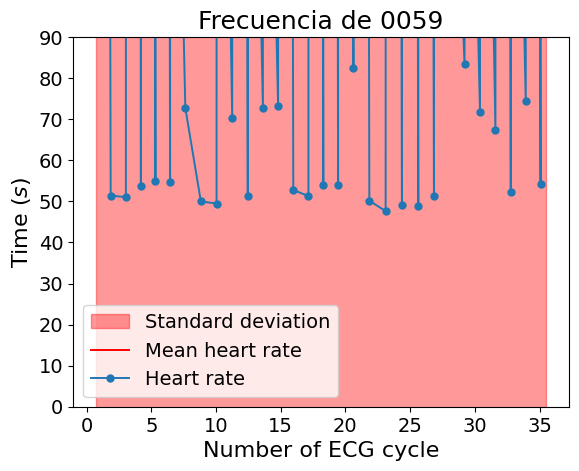

<ipython-input-8-fd27a1ede8f7>:24: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


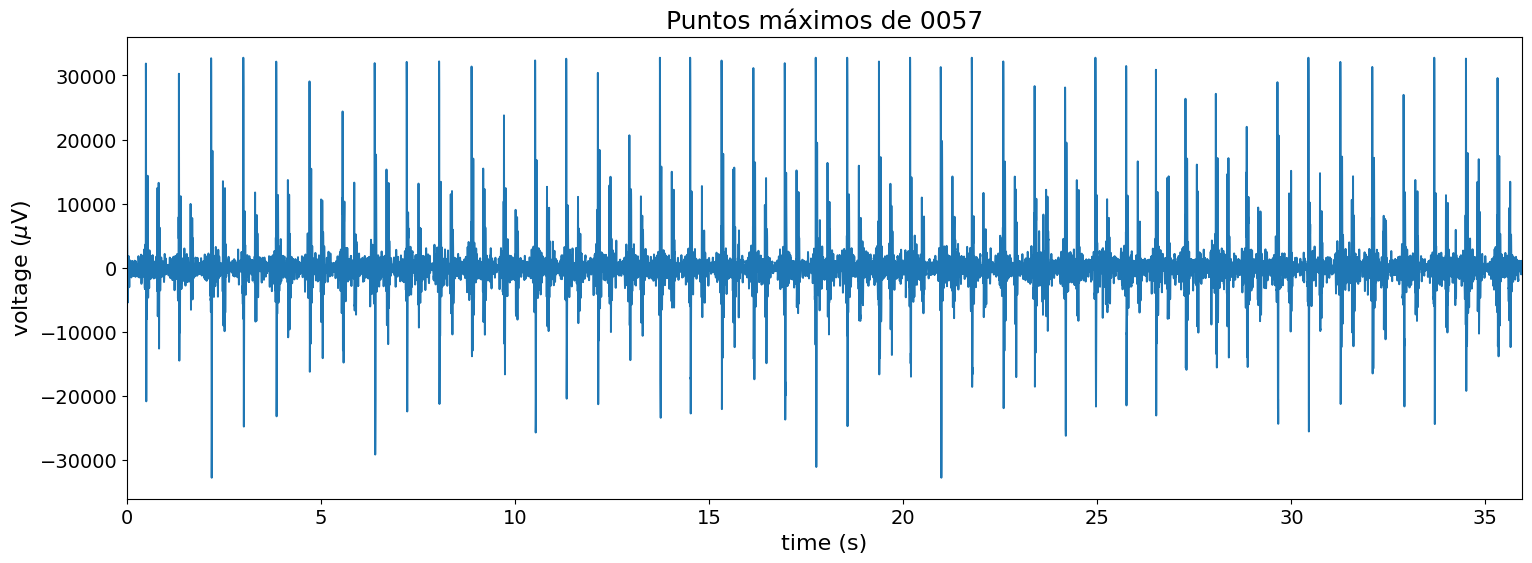

Beats per minute: 0.0


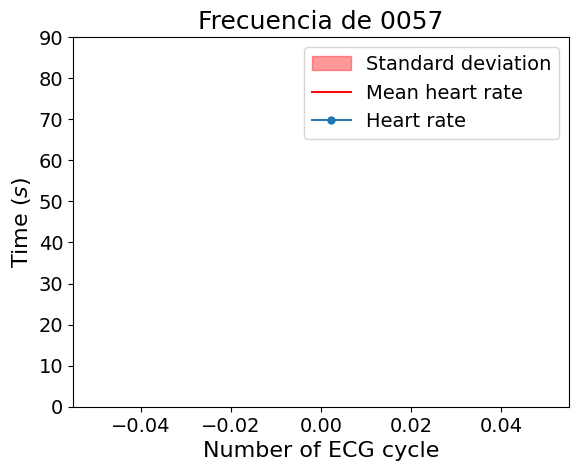

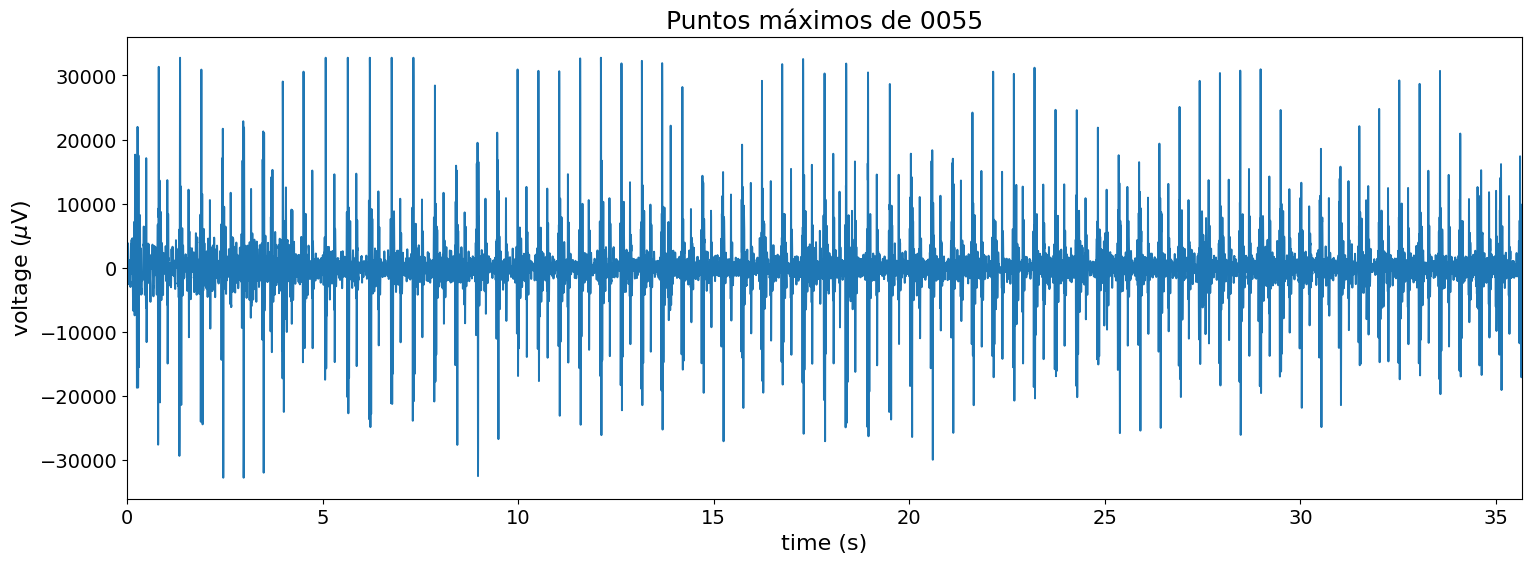

Beats per minute: 0.0


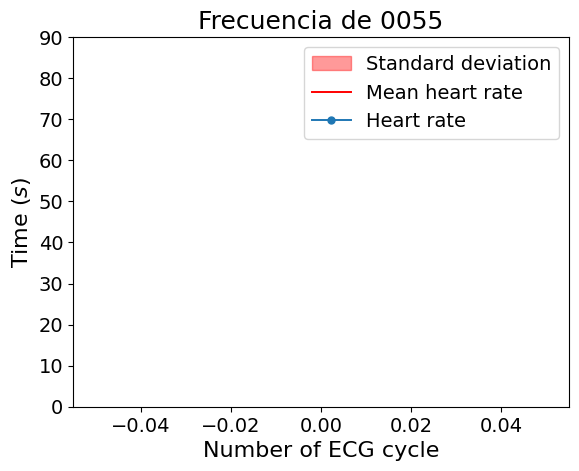

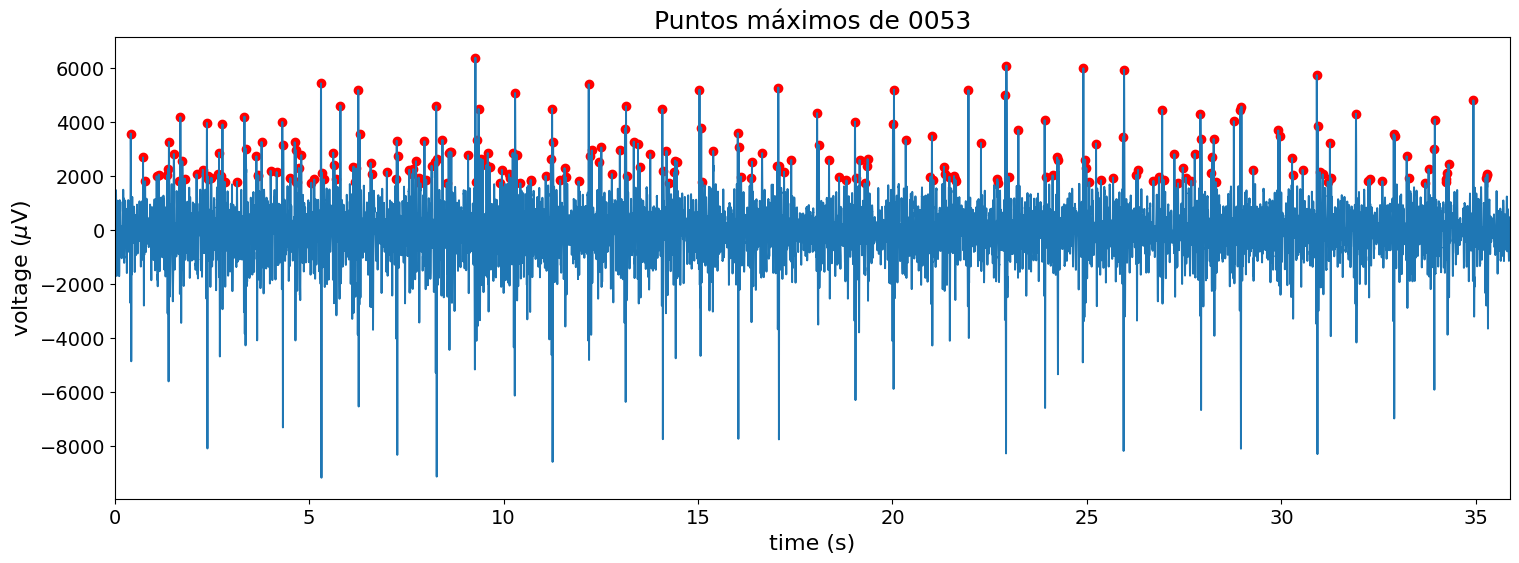

Beats per minute: 406.411149825784


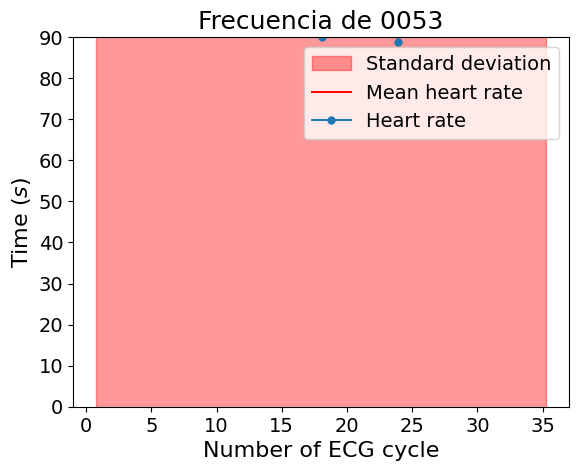

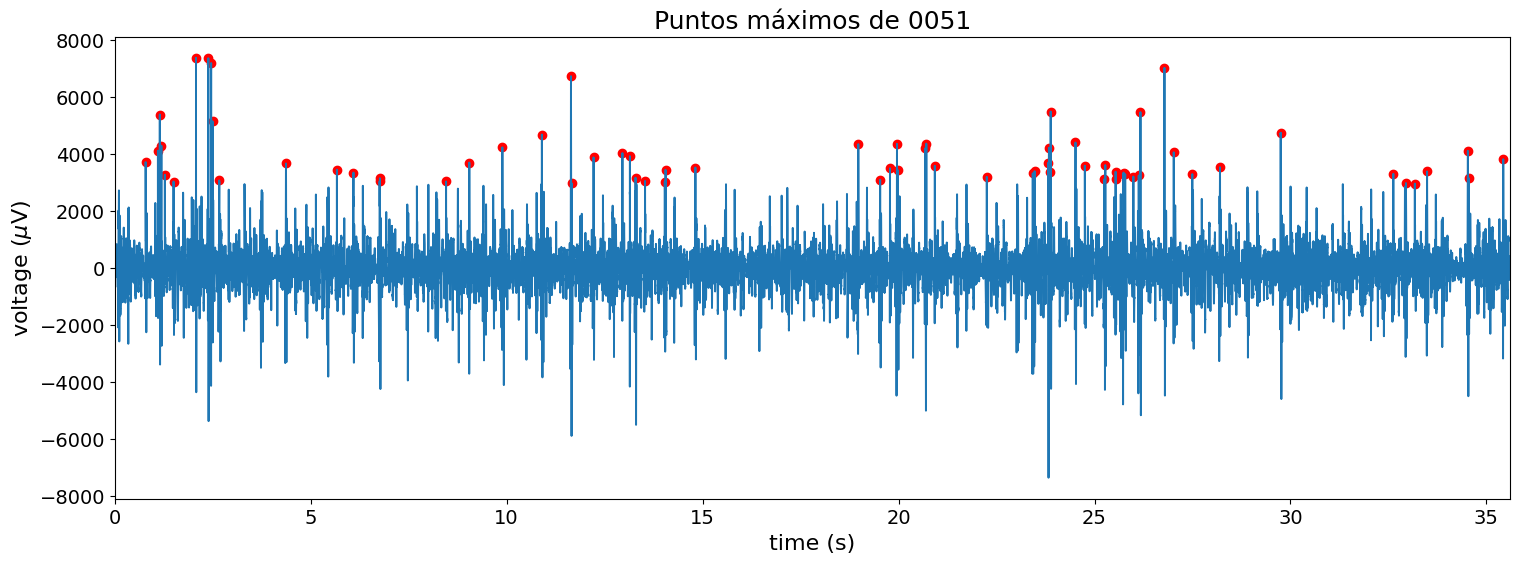

Beats per minute: 116.30356917112638


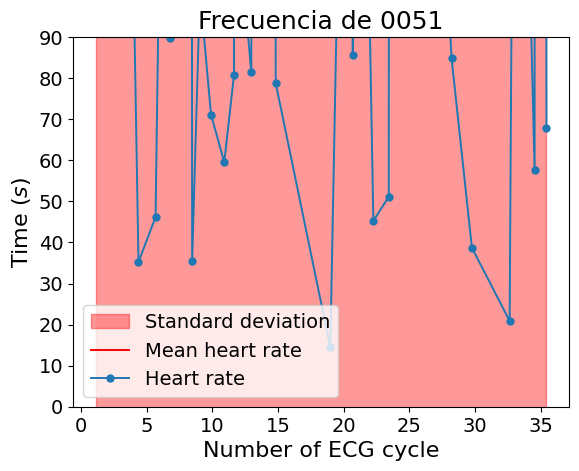

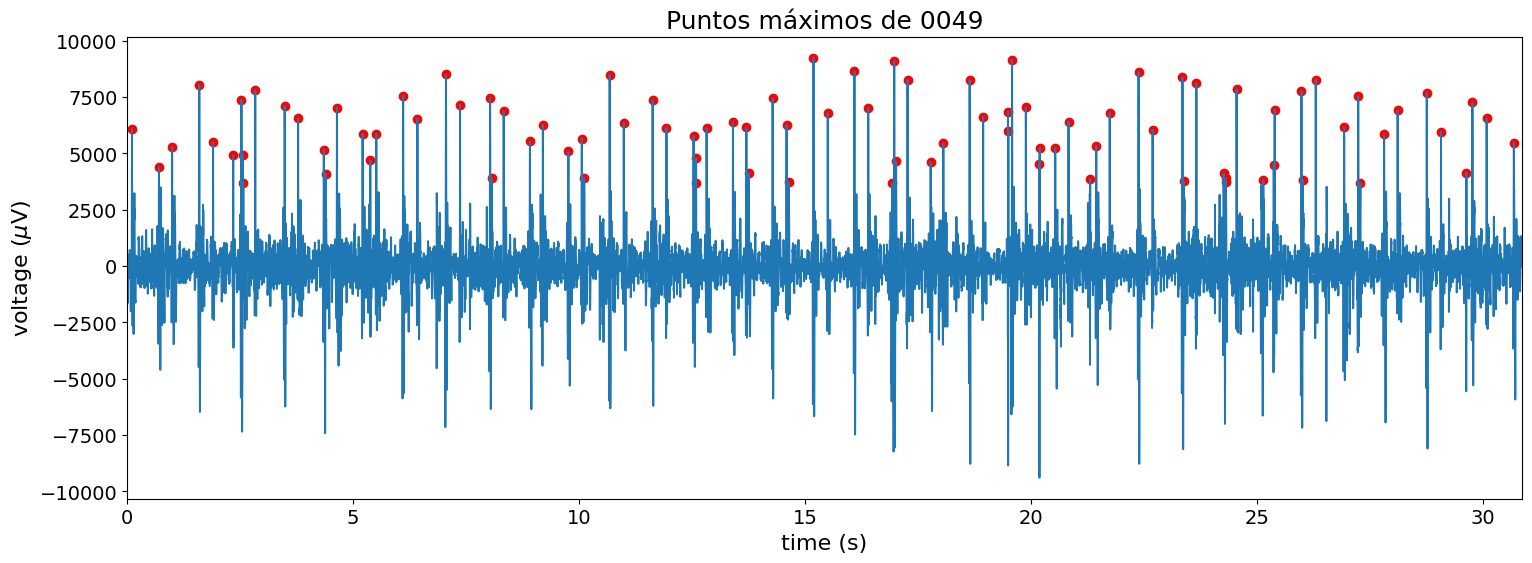

Beats per minute: 180.81952073105526


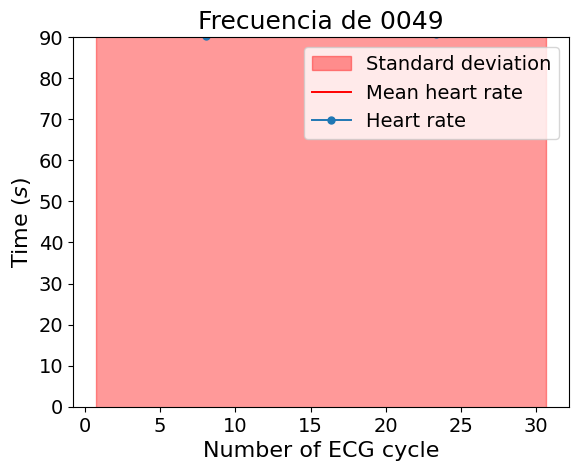

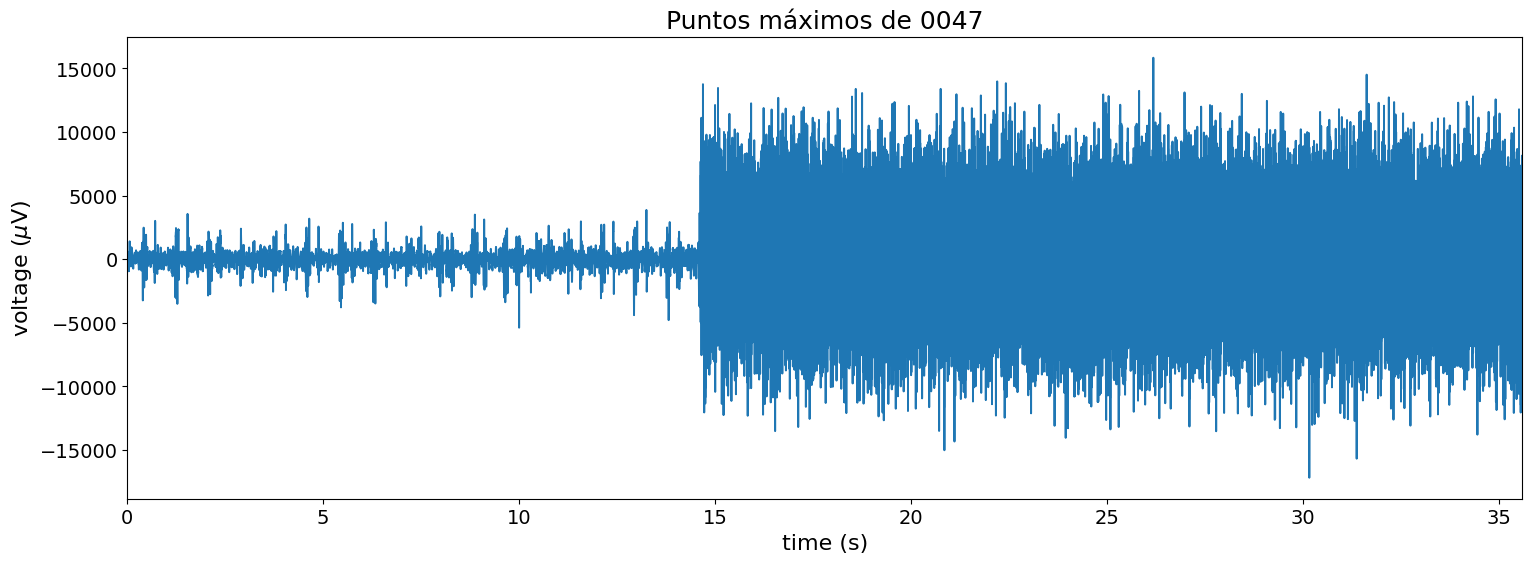

Beats per minute: 0.0


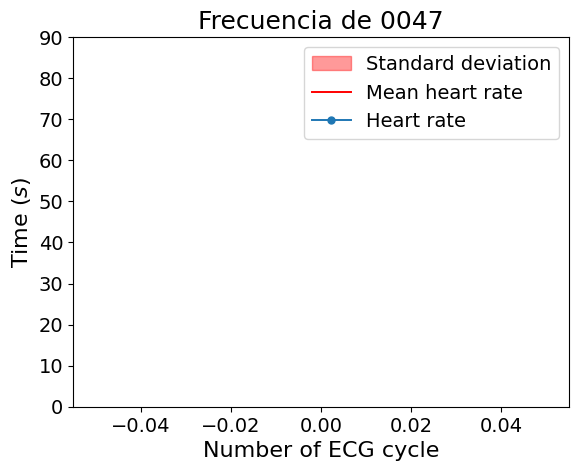

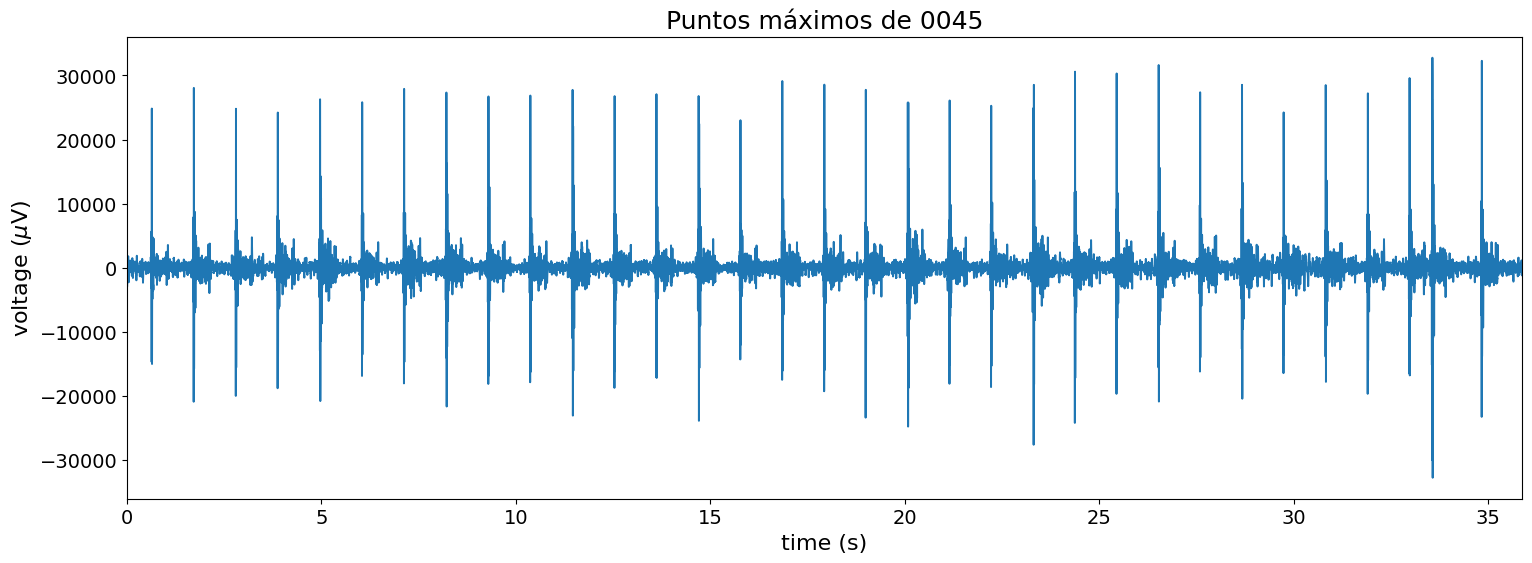

Beats per minute: 0.0


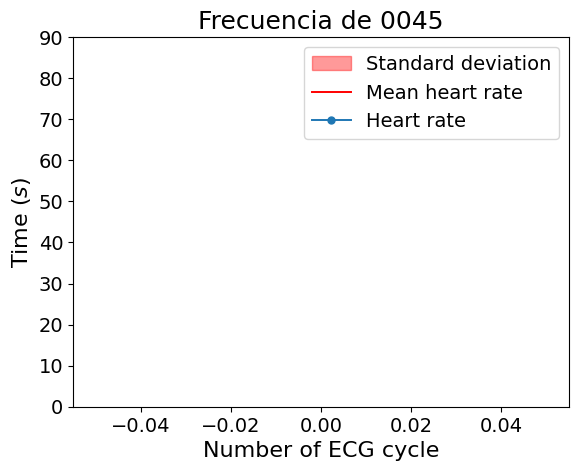

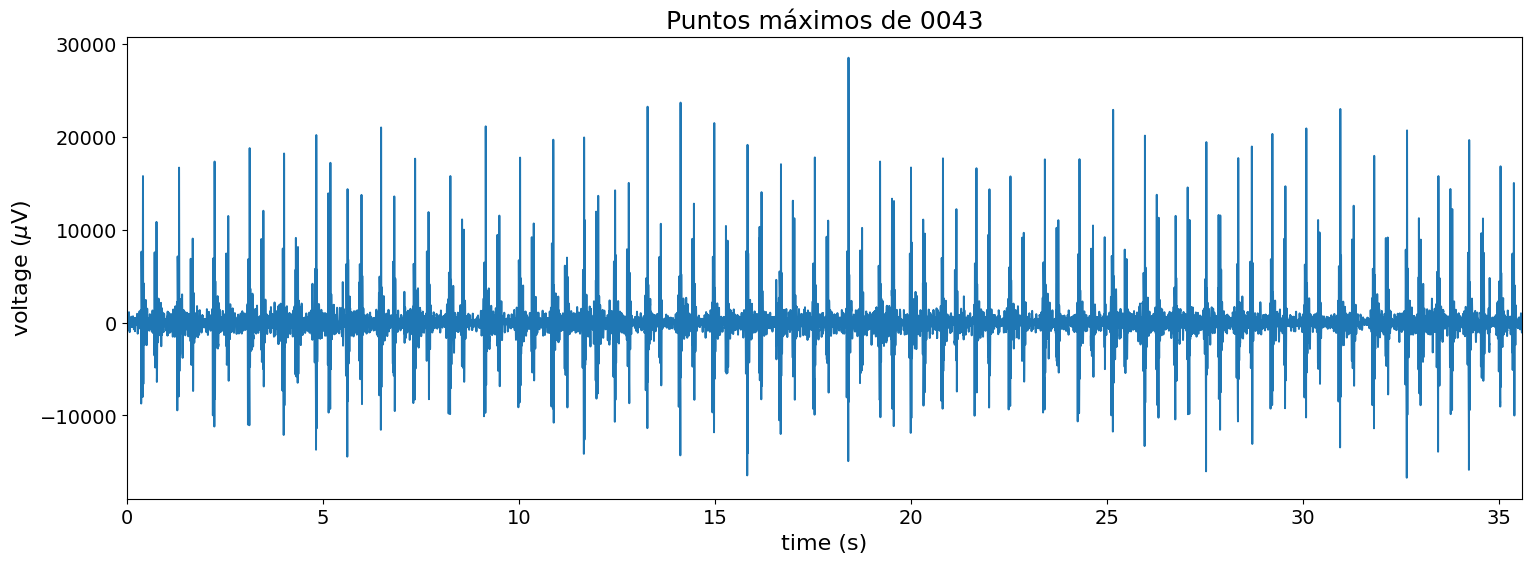

Beats per minute: 0.0


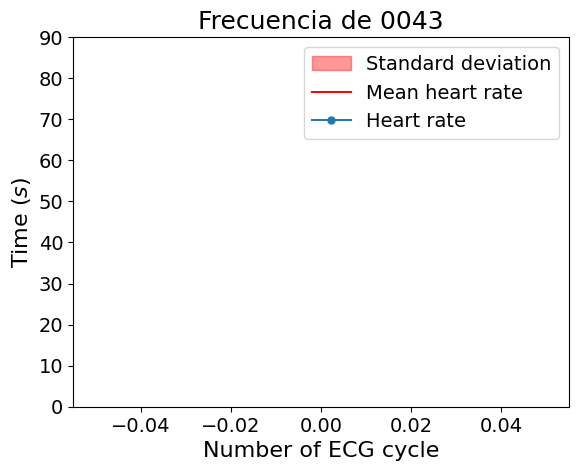

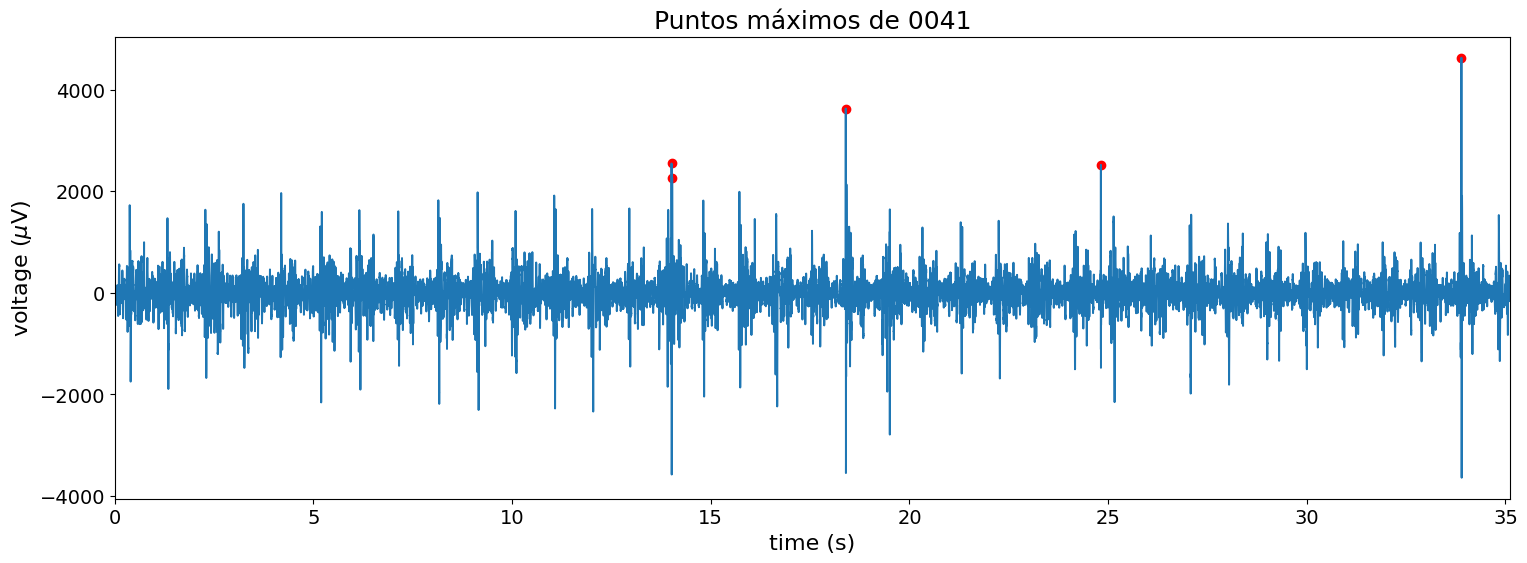

Beats per minute: 8.54481756814492


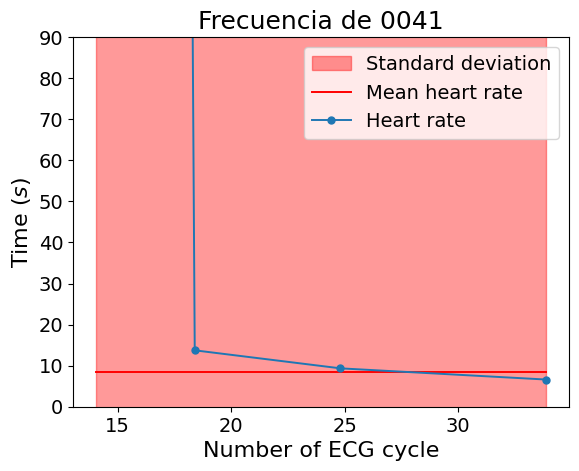

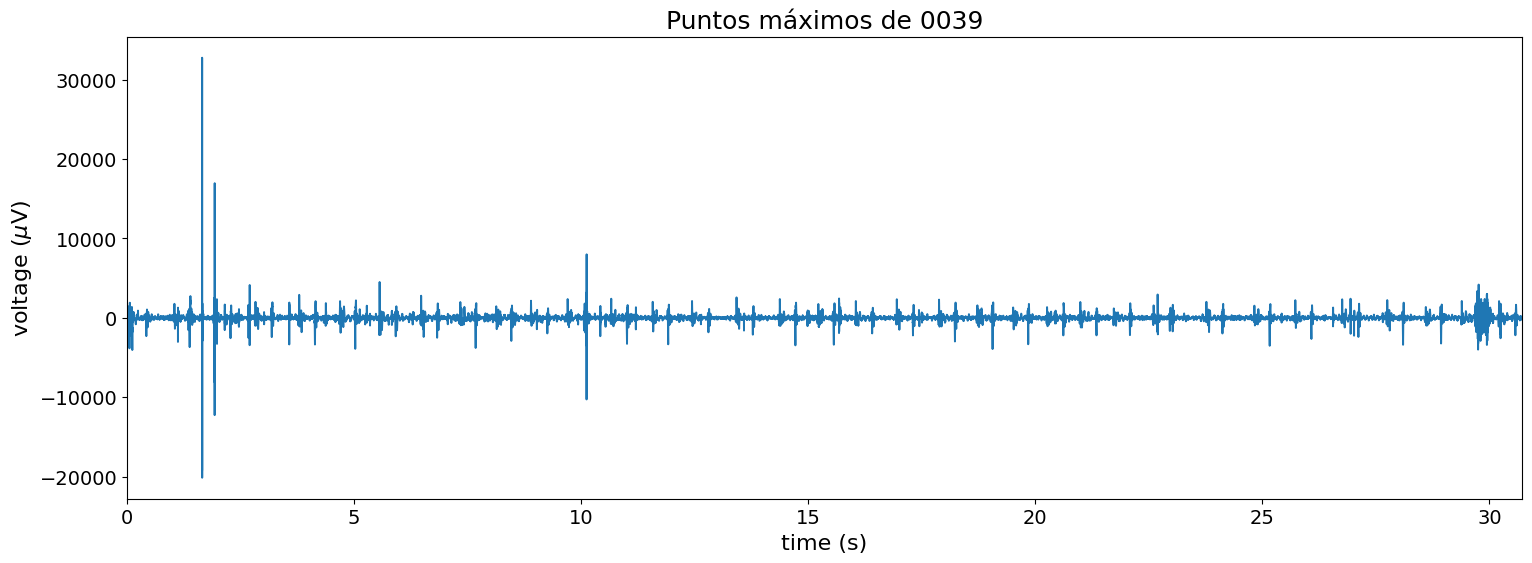

Beats per minute: 0.0


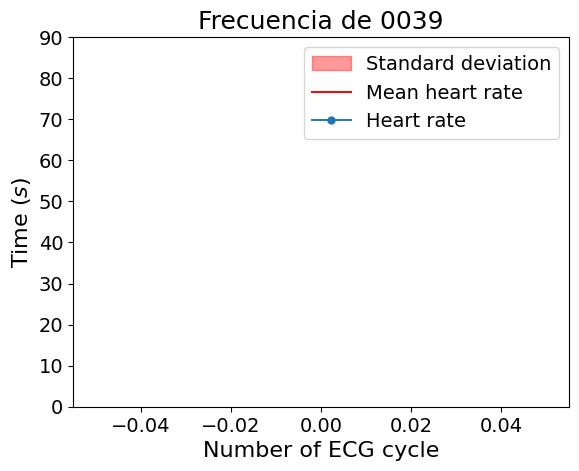

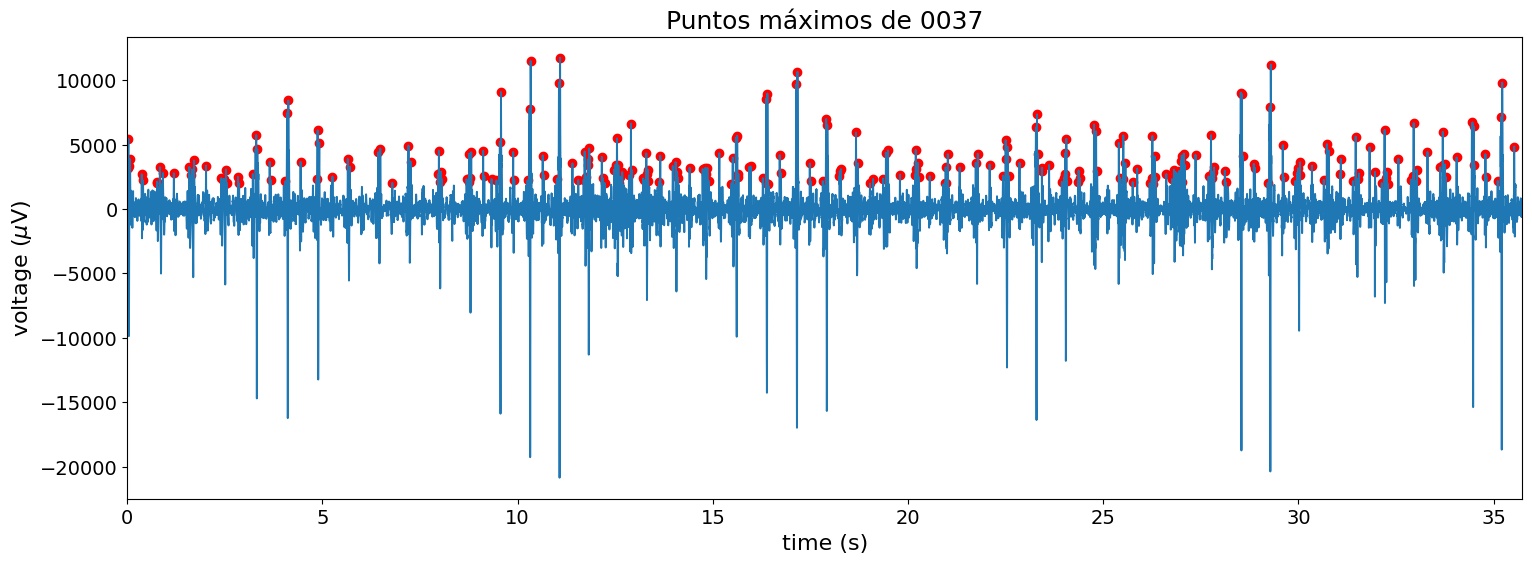

Beats per minute: 453.3243787777032


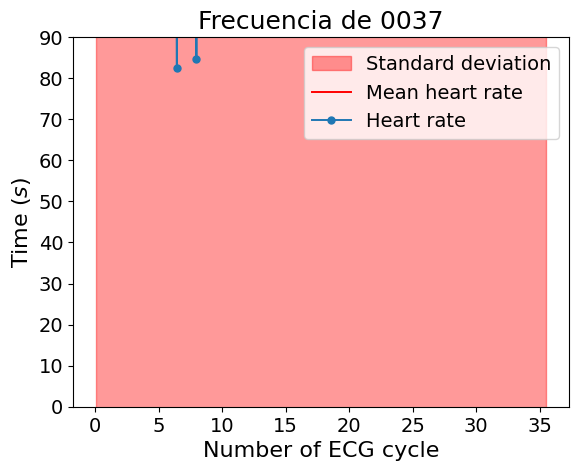

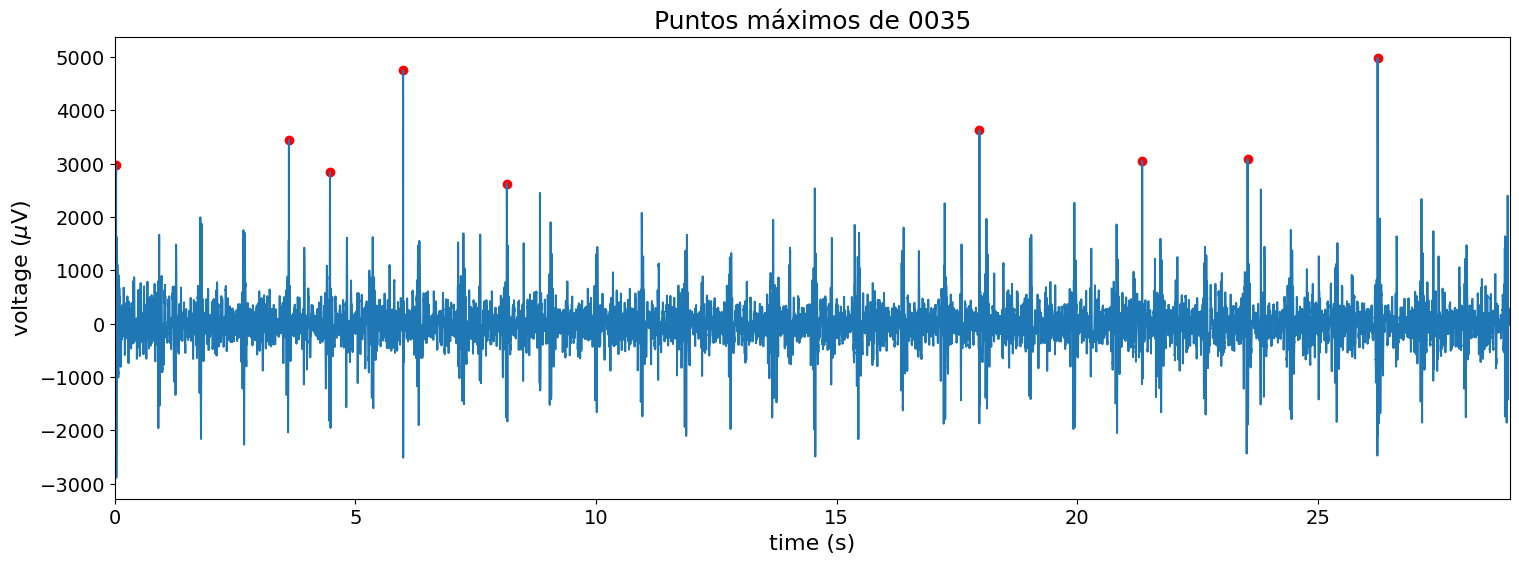

Beats per minute: 18.63193306305529


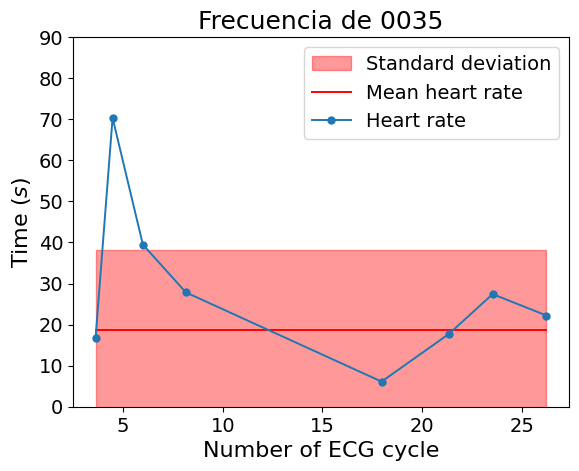

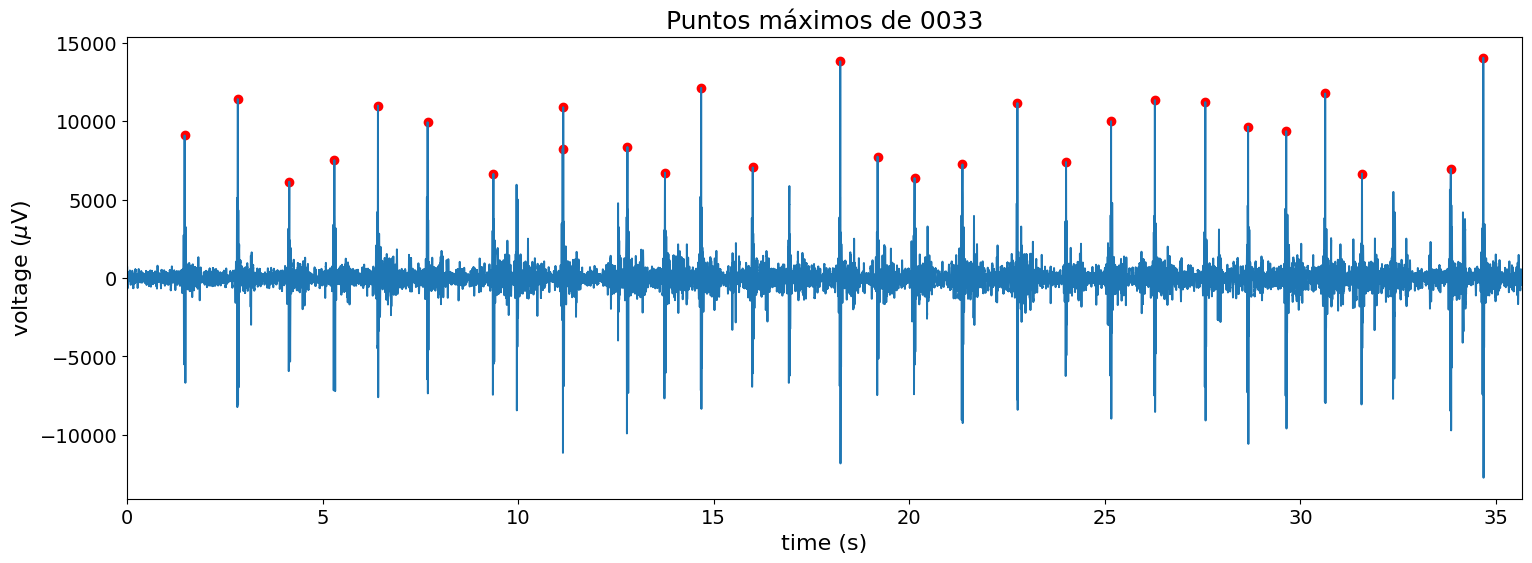

Beats per minute: 47.10368418101273


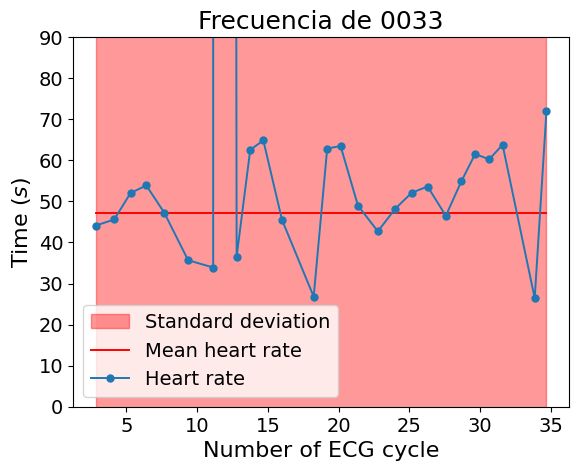

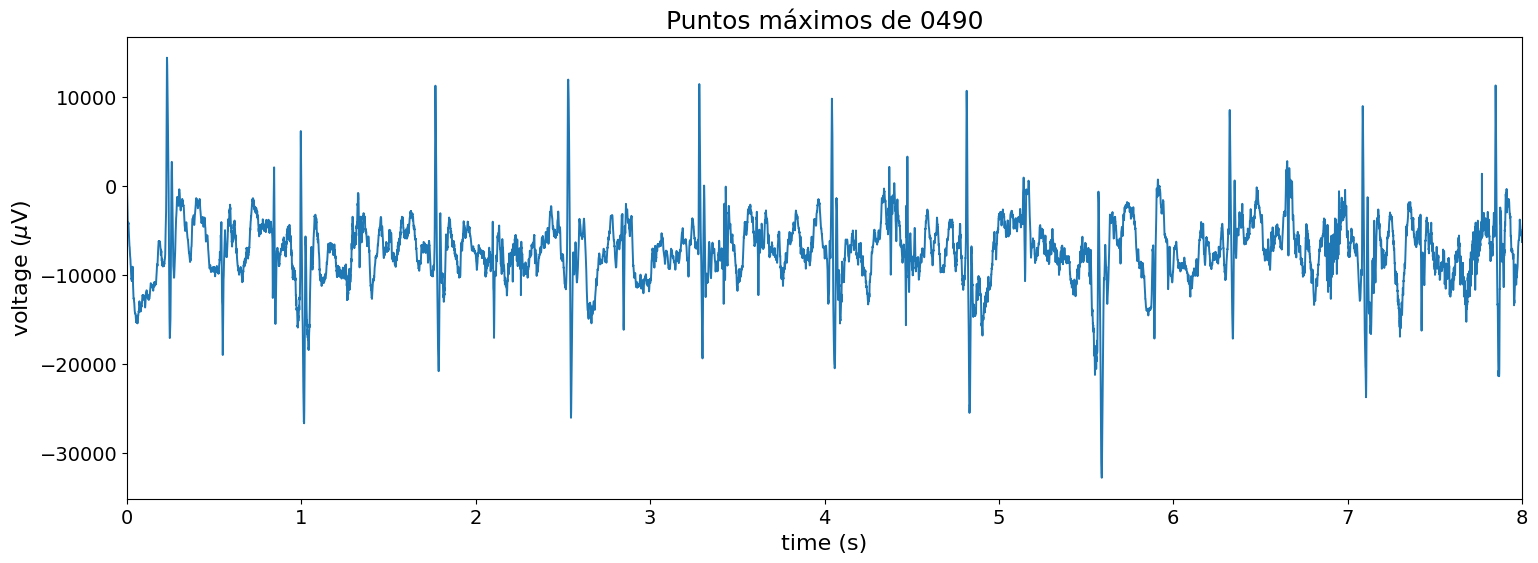

Beats per minute: 0.0


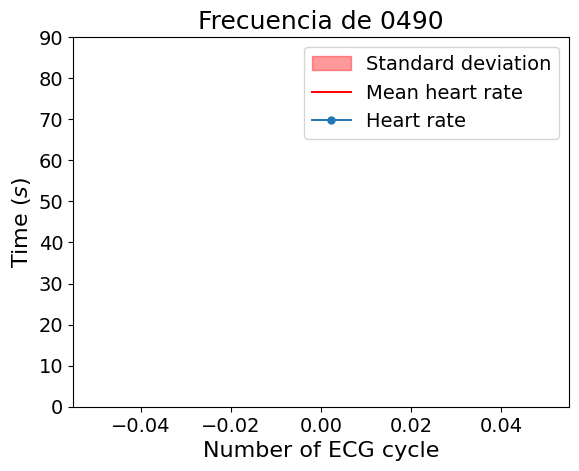

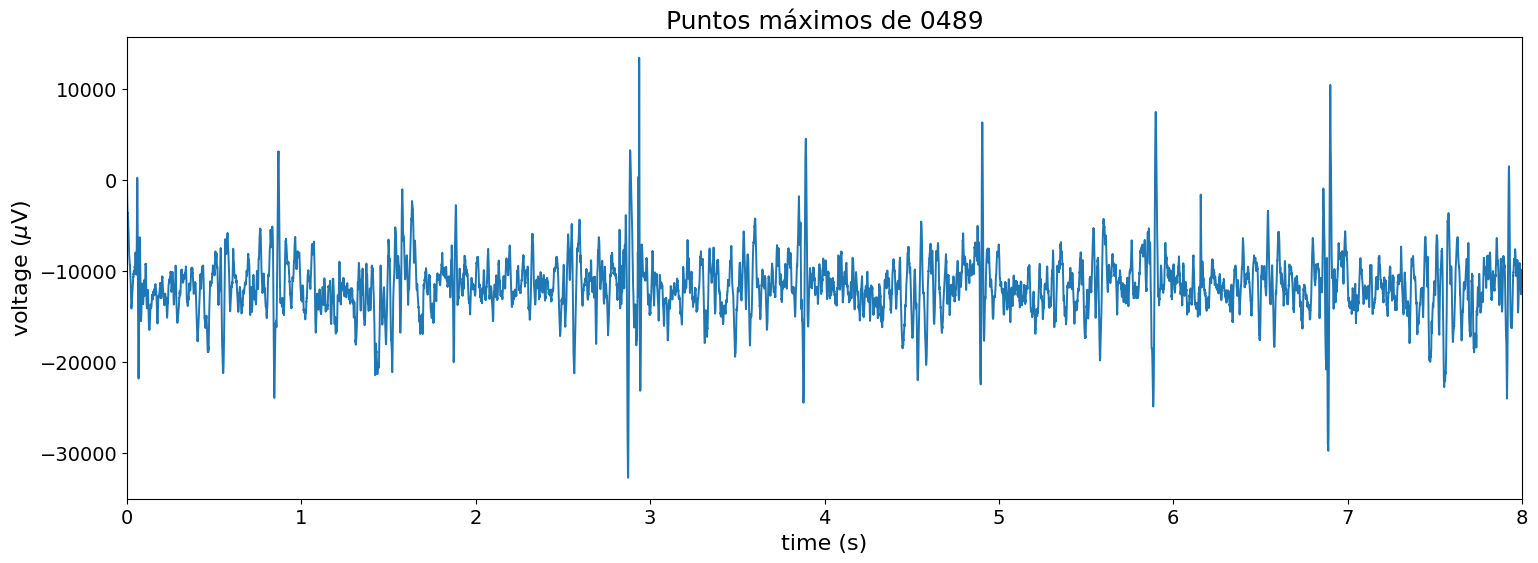

Beats per minute: 0.0


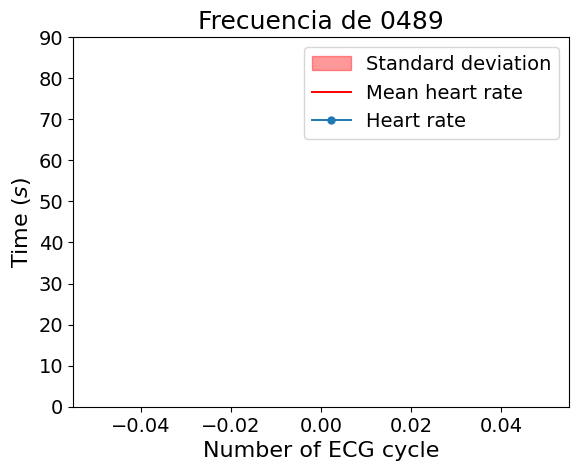

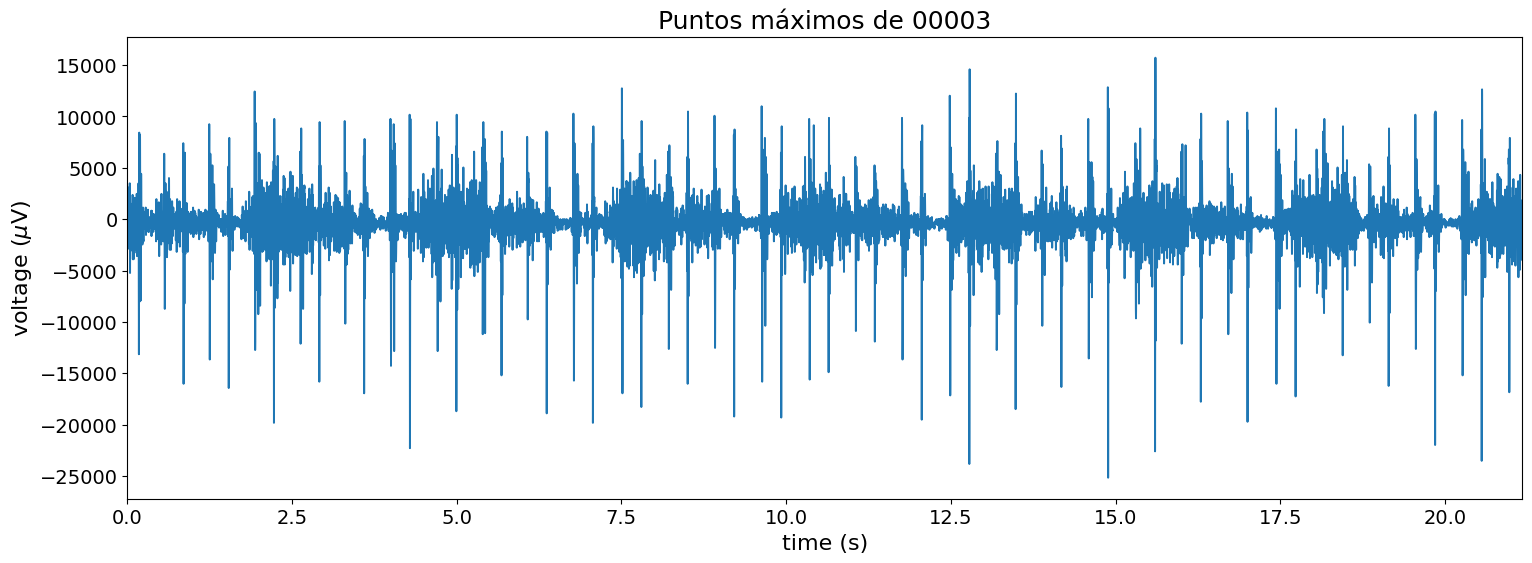

Beats per minute: 0.0


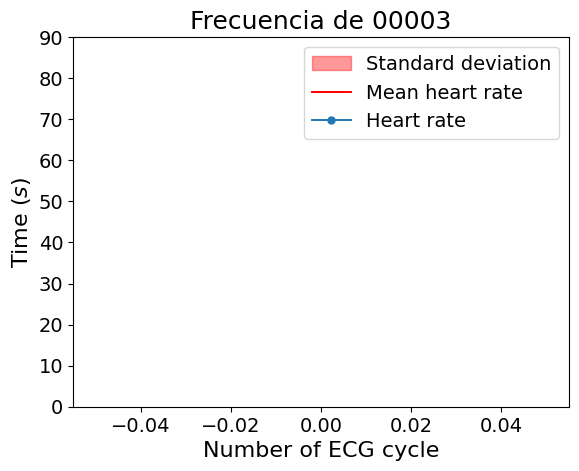

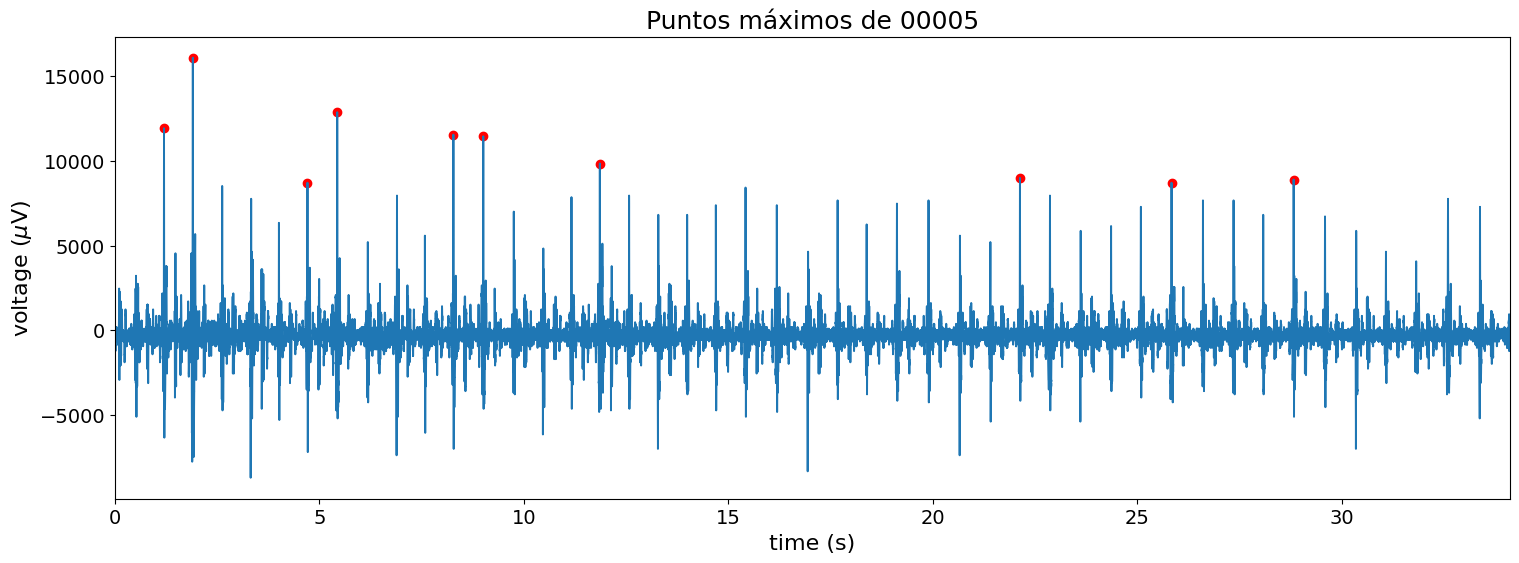

Beats per minute: 17.590665220323082


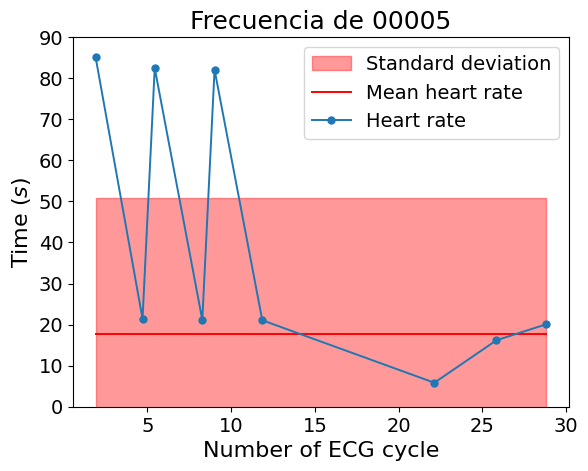

In [ ]:
def ecg(filename):
    record = wave.open(filename, 'rb')  # Abre el archivo
    # Obtiene la información del archivo
    numChannels = record.getnchannels()
    numFrames = record.getnframes()
    sampleRate = record.getframerate()
    sampleWidth = record.getsampwidth()

    # Obtiene los datos del archivo
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Obtiene la ventana de tiempo
    timeECG = np.linspace(0, len(waveData) / sampleRate, num=len(waveData))

    return timeECG, waveData
def detecta_maximos_locales(timeECG, waveData, threshold_ratio= 0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices
# Especifica el directorio en el que deseas buscar archivos .wav
variable = '/content/drive/MyDrive/audios - copia'
archivos_wav = glob.glob(f'{variable}/*.wav')

# Utiliza glob para buscar archivos .wav en el directorio especificado
nice = archivos_wav

for filename in nice:
    timeECG, waveData = ecg(filename)
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.plot(timeECG, waveData)
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    mensaje = filename
    mensajeb = mensaje[39:44]
    mensajec = mensajeb.replace(".", "")
    plt.title("Puntos máximos de " + mensajec)
    plt.show()

    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Beats per minute:", mean_bpm)
    heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
    time = timeECG[mxs_indices]

    mean_vec = [mean_bpm for i in range(0, len(time)-1)]
    std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
    std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
    plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
    plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
    plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
    plt.ylim((0, 90))
    mensaje = filename
    mensajeb = mensaje[39:44]
    mensajec = mensajeb.replace(".", "")
    plt.title("Frecuencia de " + mensajec)
    plt.xlabel(r'Number of ECG cycle')
    plt.ylabel(r'Time ($s$)')
    plt.legend()
    plt.show()


